In [2]:
import pandas as pd
import numpy as np

In [3]:
trainpred=pd.read_csv('trainpred.csv')


In [4]:
testpred=pd.read_csv('testpred.csv')

In [5]:
trainpred.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

In [6]:
trainpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
testpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
trainpred.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
trainpred.nunique()


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
trainpred

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

<AxesSubplot:ylabel='Density'>

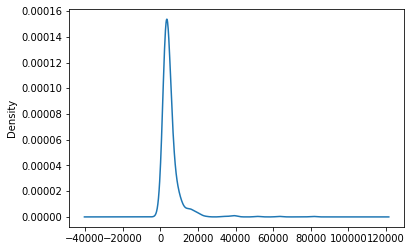

In [11]:
trainpred.ApplicantIncome.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

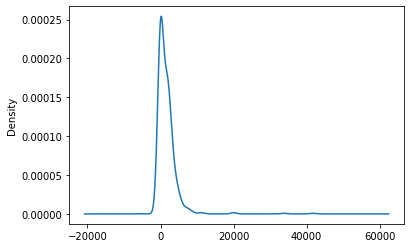

In [12]:
trainpred.CoapplicantIncome.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

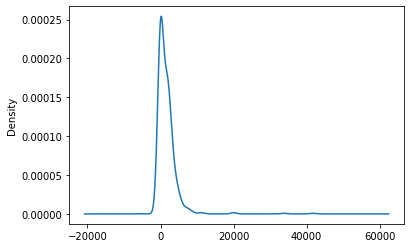

In [13]:
trainpred.CoapplicantIncome.plot(kind='kde')

In [14]:
# a better way to do this is to create a larger dict contianing subdict to replace ->
gendeerdict={"Male":0, "Female":1}
marrieddict={"No":0,"Yes":1}
educationdict={"Not Graduate":0,"Graduate":1}
propertydict={"Urban":0,"Rural":1,"Semiurban":2}
loanstatdict={"N":0,"Y":1}

credithist={"True":1, "False":0}



In [15]:
trainpred.Loan_Status.unique()


array(['Y', 'N'], dtype=object)

In [16]:
trainpred=trainpred.replace(gendeerdict)
trainpred=trainpred.replace(marrieddict)
trainpred=trainpred.replace(educationdict)
trainpred=trainpred.replace(propertydict)
trainpred=trainpred.replace(loanstatdict)



In [17]:
testpred=testpred.replace(gendeerdict)
testpred=testpred.replace(marrieddict)
testpred=testpred.replace(educationdict)
testpred=testpred.replace(propertydict)
testpred=testpred.replace(loanstatdict)



In [18]:
trainpred=trainpred.replace(credithist)



In [19]:
testpred=testpred.replace(credithist)

In [20]:
trainpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


In [21]:
trainpred.Gender = trainpred.Gender.astype(object)
trainpred.Credit_History = trainpred.Credit_History.astype(object)
trainpred.Education = trainpred.Education.astype(object)
trainpred.Self_Employed = trainpred.Self_Employed.astype(object)
trainpred.Property_Area = trainpred.Property_Area.astype(object)
trainpred.Loan_Status = trainpred.Loan_Status.astype(object)
trainpred.Married = trainpred.Married.astype(object)


In [22]:
testpred.Gender = testpred.Gender.astype(object)
testpred.Credit_History = testpred.Credit_History.astype(object)
testpred.Education = testpred.Education.astype(object)
testpred.Self_Employed = testpred.Self_Employed.astype(object)
testpred.Property_Area = testpred.Property_Area.astype(object)
#testpred.Loan_Status = testpred.Loan_Status.astype(object)
testpred.Married = testpred.Married.astype(object)

In [23]:
trainpred



Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002    0.0     0.0          0         1           0.0   
1    LP001003    0.0     1.0          1         1           0.0   
2    LP001005    0.0     1.0          0         1           1.0   
3    LP001006    0.0     1.0          0         0           0.0   
4    LP001008    0.0     0.0          0         1           0.0   
..        ...    ...     ...        ...       ...           ...   
609  LP002978    1.0     0.0          0         1           0.0   
610  LP002979    0.0     1.0         3+         1           0.0   
611  LP002983    0.0     1.0          1         1           0.0   
612  LP002984    0.0     1.0          2         1           0.0   
613  LP002990    1.0     0.0          0         1           1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0              1.0             0           1  
1              1.0             1           0  
2              1.0             0           1  
3              1.0             0           1  
4              1.0             0           1  
..             ...           ...         ...  
609            1.0             1           1  
610            1.0             1           1  
611            1.0             0           1  
612            1.0             0           1  
613            0.0             2           0  

[614 rows x 13 columns]

In [24]:
for i in range(0,614):
    if trainpred.Credit_History[i] == 'True':
        trainpred.Credit_History[i]=1
    if trainpred.Credit_History[i] == 'False':
        trainpred.Credit_History[i]=0
        


In [25]:
for i in range(0,366):
    if testpred.Credit_History[i] == 'True':
        testpred.Credit_History[i]=1
    if testpred.Credit_History[i] == 'False':
        testpred.Credit_History[i]=0
        



In [26]:
trainpred.LoanAmount=trainpred.LoanAmount.replace(np.nan,0)


In [27]:
testpred.LoanAmount=testpred.LoanAmount.replace(np.nan,0)

In [28]:
trainpred.LoanAmount


0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [29]:
trainpred.Dependents=trainpred.Dependents.replace("3+",3)


In [30]:
testpred.Dependents=testpred.Dependents.replace("3+",3)

In [31]:
trainpred.Dependents.unique()


array(['0', '1', '2', 3, nan], dtype=object)

In [32]:
trainpred[trainpred.Credit_History.isnull()==True]


Loan_ID Gender Married Dependents Education Self_Employed  \
16   LP001034    0.0     0.0          1         0           0.0   
24   LP001052    0.0     1.0          1         1           NaN   
30   LP001091    0.0     1.0          1         1           NaN   
42   LP001123    0.0     1.0          0         1           0.0   
79   LP001264    0.0     1.0          3         0           1.0   
83   LP001273    0.0     1.0          0         1           0.0   
86   LP001280    0.0     1.0          2         0           0.0   
95   LP001326    0.0     0.0          0         1           NaN   
117  LP001405    0.0     1.0          1         1           0.0   
125  LP001443    1.0     0.0          0         1           0.0   
129  LP001465    0.0     1.0          0         1           0.0   
130  LP001469    0.0     0.0          0         1           1.0   
156  LP001541    0.0     1.0          1         1           0.0   
181  LP001634    0.0     0.0          0         1           0.0   
187  LP001643    0.0     1.0          0         1           0.0   
198  LP001671    1.0     1.0          0         1           0.0   
219  LP001734    1.0     1.0          2         1           0.0   
236  LP001786    0.0     1.0          0         1           NaN   
237  LP001788    1.0     0.0          0         1           1.0   
259  LP001864    0.0     1.0          3         0           0.0   
260  LP001865    0.0     1.0          1         1           0.0   
279  LP001908    1.0     1.0          0         0           0.0   
309  LP001998    0.0     1.0          2         0           0.0   
313  LP002008    0.0     1.0          2         1           1.0   
317  LP002036    0.0     1.0          0         1           0.0   
318  LP002043    1.0     0.0          1         1           0.0   
323  LP002055    1.0     0.0          0         1           0.0   
348  LP002137    0.0     1.0          0         1           0.0   
363  LP002178    0.0     1.0          0         1           0.0   
377  LP002223    0.0     1.0          0         1           0.0   
392  LP002263    0.0     1.0          0         1           0.0   
395  LP002272    0.0     1.0          2         1           0.0   
411  LP002319    0.0     1.0          0         1           NaN   
444  LP002424    0.0     1.0          0         1           0.0   
449  LP002444    0.0     0.0          1         0           1.0   
451  LP002447    0.0     1.0          2         0           0.0   
460  LP002478    NaN     1.0          0         1           1.0   
473  LP002522    1.0     0.0          0         1           1.0   
490  LP002560    0.0     0.0          0         0           0.0   
491  LP002562    0.0     1.0          1         0           0.0   
497  LP002588    0.0     1.0          0         1           0.0   
503  LP002618    0.0     1.0          1         0           0.0   
506  LP002624    0.0     1.0          0         1           0.0   
530  LP002717    0.0     1.0          0         1           0.0   
533  LP002729    0.0     0.0          1         1           0.0   
544  LP002757    1.0     1.0          0         0           0.0   
556  LP002794    1.0     0.0          0         1           0.0   
565  LP002833    0.0     1.0          0         0           0.0   
583  LP002898    0.0     1.0          1         1           0.0   
600  LP002949    1.0     0.0          3         1           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
16              3596                0.0       100.0             240.0   
24              3717             2925.0       151.0             360.0   
30              4166             3369.0       201.0             360.0   
42              2400                0.0        75.0             360.0   
79              3333             2166.0       130.0             360.0   
83              6000             2250.0       265.0             360.0   
86              3333             2000.0        99.0             360.0   
95  

In [33]:
trainpred.dropna()


Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002    0.0     0.0          0         1           0.0   
1    LP001003    0.0     1.0          1         1           0.0   
2    LP001005    0.0     1.0          0         1           1.0   
3    LP001006    0.0     1.0          0         0           0.0   
4    LP001008    0.0     0.0          0         1           0.0   
..        ...    ...     ...        ...       ...           ...   
609  LP002978    1.0     0.0          0         1           0.0   
610  LP002979    0.0     1.0          3         1           0.0   
611  LP002983    0.0     1.0          1         1           0.0   
612  LP002984    0.0     1.0          2         1           0.0   
613  LP002990    1.0     0.0          0         1           1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         0.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0              1.0             0           1  
1              1.0             1           0  
2              1.0             0           1  
3              1.0             0           1  
4              1.0             0           1  
..             ...           ...         ...  
609            1.0             1           1  
610            1.0             1           1  
611            1.0             0           1  
612            1.0             0           1  
613            0.0             2           0  

[499 rows x 13 columns]

In [34]:
trainpred.Credit_History=trainpred.Credit_History.replace(np.nan,2)


In [35]:
testpred.Credit_History=testpred.Credit_History.replace(np.nan,2)


In [36]:
trainpred.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
trainpred.Gender=trainpred.Gender.replace(np.nan,2)

In [38]:
testpred.Gender=testpred.Gender.replace(np.nan,2)

In [39]:
trainpred.Married=trainpred.Married.replace(np.nan,2)

In [40]:
testpred.Married=testpred.Married.replace(np.nan,2)

In [41]:
trainpred.Dependents=trainpred.Dependents.replace(np.nan,2)

In [42]:
testpred.Dependents=testpred.Dependents.replace(np.nan,2)

In [43]:
trainpred.Self_Employed=trainpred.Self_Employed.replace(np.nan,2)

In [44]:
testpred.Self_Employed=testpred.Self_Employed.replace(np.nan,2)

In [45]:
trainpred=trainpred.drop("Loan_Amount_Term",axis=1)

In [46]:
testpred=testpred.drop("Loan_Amount_Term",axis=1)

In [47]:
trainpred.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
testpred.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [49]:
trainpred.describe()

Gender     Married  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000     614.000000       614.000000   
mean     0.224756    0.657980       0.237785      5403.459283   
std      0.465767    0.484971       0.534737      6109.041673   
min      0.000000    0.000000       0.000000       150.000000   
25%      0.000000    0.000000       0.000000      2877.500000   
50%      0.000000    1.000000       0.000000      3812.500000   
75%      0.000000    1.000000       0.000000      5795.000000   
max      2.000000    2.000000       2.000000     81000.000000   

       CoapplicantIncome  LoanAmount  Credit_History  
count         614.000000  614.000000      614.000000  
mean         1621.245798  141.166124        0.936482  
std          2926.248369   88.340630        0.471924  
min             0.000000    0.000000        0.000000  
25%             0.000000   98.000000        1.000000  
50%          1188.500000  125.000000        1.000000  
75%          2297.250000  164.750000        1.000000  
max         41667.000000  700.000000        2.000000

In [50]:
trainpredx=trainpred.drop("Loan_ID",axis=1)

In [51]:
testpredx=testpred.drop("Loan_ID",axis=1)

In [52]:
trainpredx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 52.9+ KB


In [53]:
trainpredx.Self_Employed= trainpredx.Self_Employed.astype(object)

In [54]:
trainpredx.Married	= trainpredx.Married.astype(object)

In [55]:
trainpredx.Credit_History=trainpredx.Credit_History.astype(object)

In [56]:
trainpredx.Gender =trainpredx.Gender.astype(object)

In [57]:
trainpredx[trainpredx.Loan_Status==0].count()/trainpredx[trainpredx.Loan_Status==1].count()

Gender               0.454976
Married              0.454976
Dependents           0.454976
Education            0.454976
Self_Employed        0.454976
ApplicantIncome      0.454976
CoapplicantIncome    0.454976
LoanAmount           0.454976
Credit_History       0.454976
Property_Area        0.454976
Loan_Status          0.454976
dtype: float64

In [58]:
trainpredx

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0      0.0     0.0          0         1           0.0             5849   
1      0.0     1.0          1         1           0.0             4583   
2      0.0     1.0          0         1           1.0             3000   
3      0.0     1.0          0         0           0.0             2583   
4      0.0     0.0          0         1           0.0             6000   
..     ...     ...        ...       ...           ...              ...   
609    1.0     0.0          0         1           0.0             2900   
610    0.0     1.0          3         1           0.0             4106   
611    0.0     1.0          1         1           0.0             8072   
612    0.0     1.0          2         1           0.0             7583   
613    1.0     0.0          0         1           1.0             4583   

     CoapplicantIncome  LoanAmount Credit_History Property_Area Loan_Status  
0                  0.0         0.0            1.0             0           1  
1               1508.0       128.0            1.0             1           0  
2                  0.0        66.0            1.0             0           1  
3               2358.0       120.0            1.0             0           1  
4                  0.0       141.0            1.0             0           1  
..                 ...         ...            ...           ...         ...  
609                0.0        71.0            1.0             1           1  
610                0.0        40.0            1.0             1           1  
611              240.0       253.0            1.0             0           1  
612                0.0       187.0            1.0             0           1  
613                0.0       133.0            0.0             2           0  

[614 rows x 11 columns]

In [59]:
trainpredx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    object 
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 52.9+ KB


In [60]:
trainpredx

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0      0.0     0.0          0         1           0.0             5849   
1      0.0     1.0          1         1           0.0             4583   
2      0.0     1.0          0         1           1.0             3000   
3      0.0     1.0          0         0           0.0             2583   
4      0.0     0.0          0         1           0.0             6000   
..     ...     ...        ...       ...           ...              ...   
609    1.0     0.0          0         1           0.0             2900   
610    0.0     1.0          3         1           0.0             4106   
611    0.0     1.0          1         1           0.0             8072   
612    0.0     1.0          2         1           0.0             7583   
613    1.0     0.0          0         1           1.0             4583   

     CoapplicantIncome  LoanAmount Credit_History Property_Area Loan_Status  
0                  0.0         0.0            1.0             0           1  
1               1508.0       128.0            1.0             1           0  
2                  0.0        66.0            1.0             0           1  
3               2358.0       120.0            1.0             0           1  
4                  0.0       141.0            1.0             0           1  
..                 ...         ...            ...           ...         ...  
609                0.0        71.0            1.0             1           1  
610                0.0        40.0            1.0             1           1  
611              240.0       253.0            1.0             0           1  
612                0.0       187.0            1.0             0           1  
613                0.0       133.0            0.0             2           0  

[614 rows x 11 columns]

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

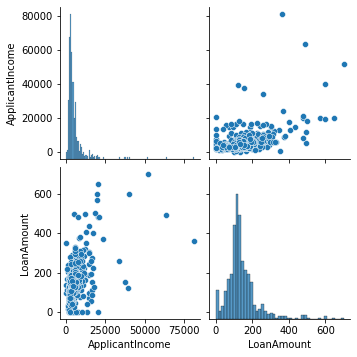

In [62]:
sns.pairplot(trainpredx[['ApplicantIncome','LoanAmount']])

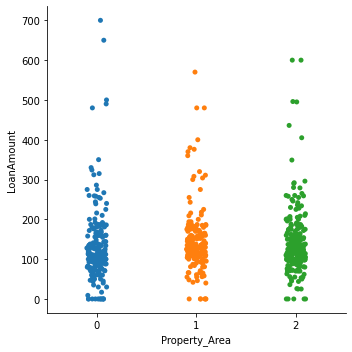

In [63]:
sns.catplot(data=trainpredx,x="Property_Area",y="LoanAmount")

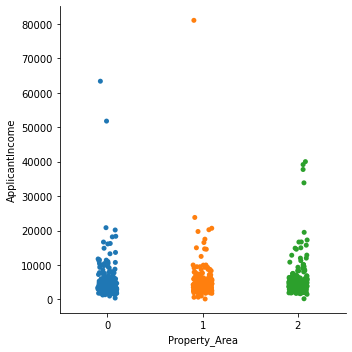

In [64]:
sns.catplot(data=trainpredx,x="Property_Area",y="ApplicantIncome")

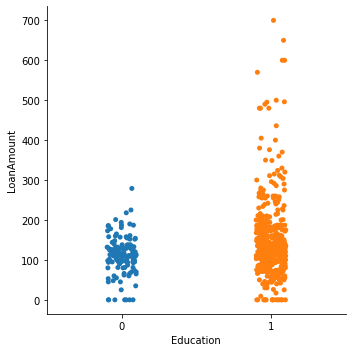

In [65]:
sns.catplot(data=trainpredx,x="Education",y="LoanAmount")

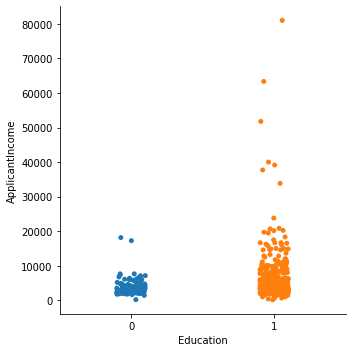

In [66]:
sns.catplot(data=trainpredx,x="Education",y="ApplicantIncome")

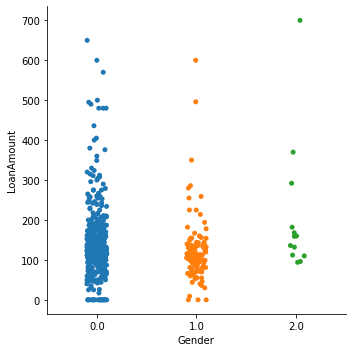

In [67]:
sns.catplot(data=trainpredx,x="Gender",y="LoanAmount")

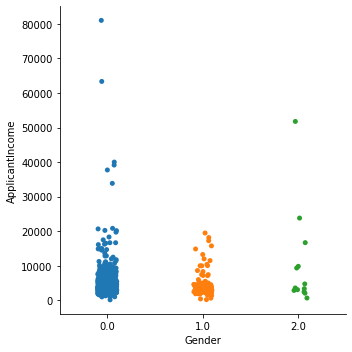

In [68]:
sns.catplot(data=trainpredx,x="Gender",y="ApplicantIncome")

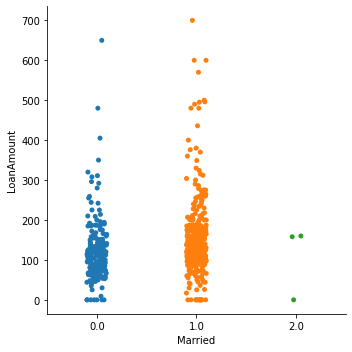

In [69]:
sns.catplot(data=trainpredx,x="Married",y="LoanAmount")

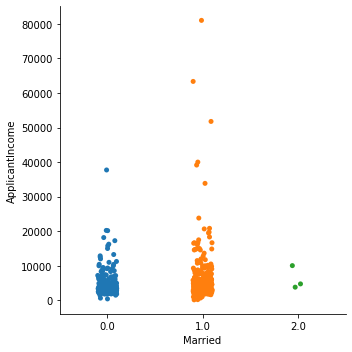

In [70]:
sns.catplot(data=trainpredx,x="Married",y="ApplicantIncome")

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

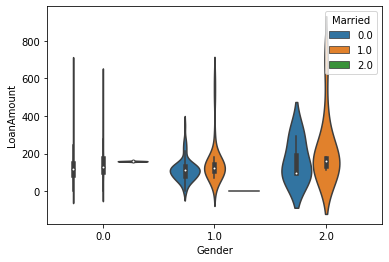

In [71]:
sns.violinplot(data=trainpredx, x="Gender", y="LoanAmount", hue="Married")

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

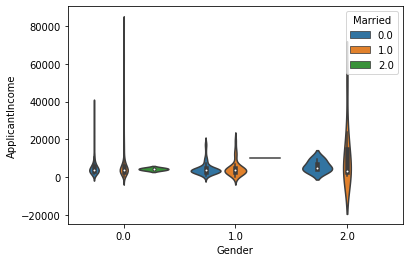

In [72]:
sns.violinplot(data=trainpredx,x="Gender",y="ApplicantIncome",hue="Married")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

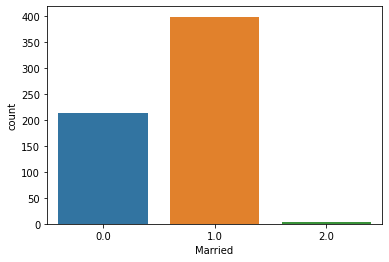

In [73]:
sns.countplot(trainpredx['Married'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

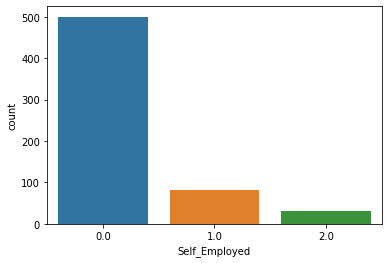

In [74]:
sns.countplot(trainpredx['Self_Employed'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

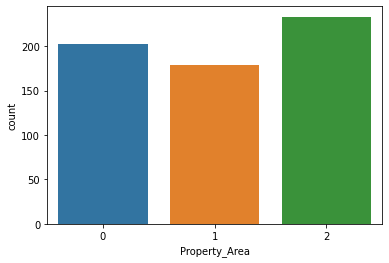

In [75]:
sns.countplot(trainpredx['Property_Area'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

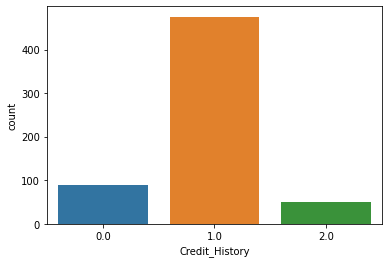

In [76]:
sns.countplot(trainpredx['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

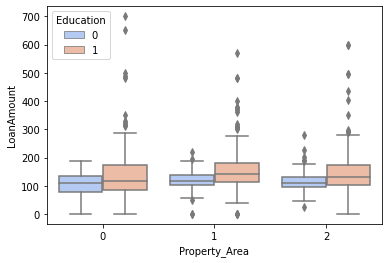

In [77]:
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=trainpredx, palette="coolwarm")

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

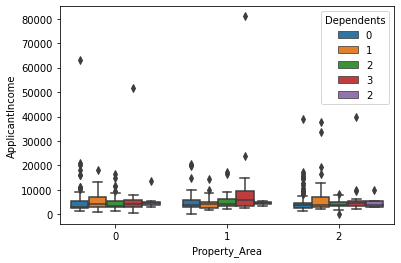

In [78]:
sns.boxplot(x="Property_Area",y="ApplicantIncome",hue="Dependents",data=trainpredx)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

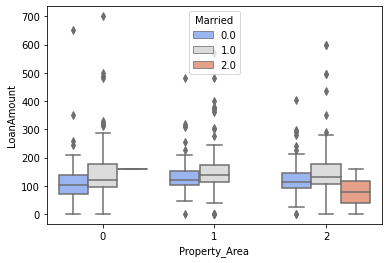

In [79]:
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Married",data=trainpredx, palette="coolwarm")

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

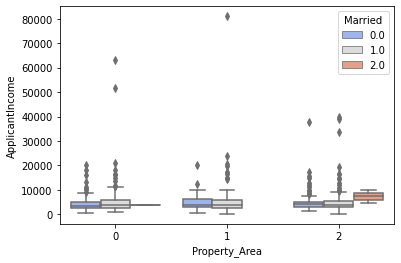

In [80]:
sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Married",data=trainpredx, palette="coolwarm")

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

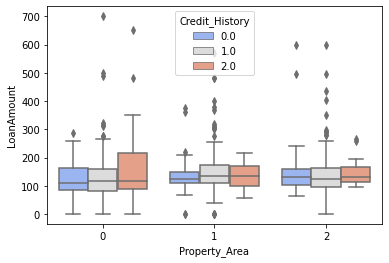

In [81]:
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Credit_History",data=trainpredx, palette="coolwarm")

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

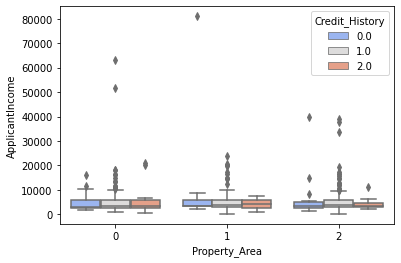

In [82]:
sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Credit_History",data=trainpredx, palette="coolwarm")

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

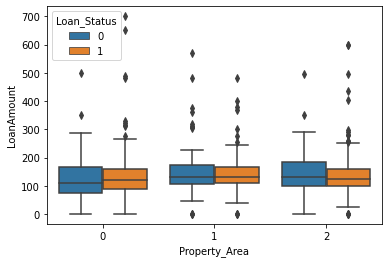

In [83]:
sns.boxplot(x="Property_Area",y="LoanAmount",hue="Loan_Status",data=trainpredx)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

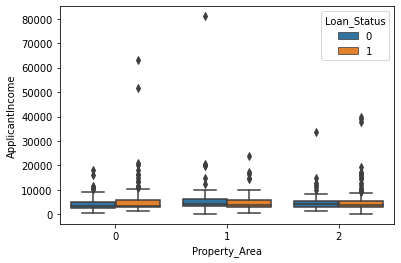

In [84]:
sns.boxplot(x="Property_Area",y="ApplicantIncome",hue="Loan_Status",data=trainpredx)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

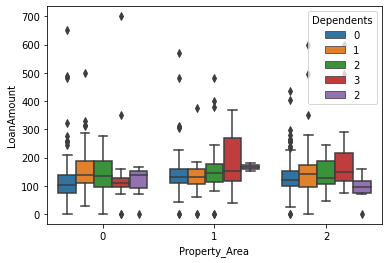

In [85]:
sns.boxplot(x="Property_Area",y="LoanAmount",hue="Dependents",data=trainpredx)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

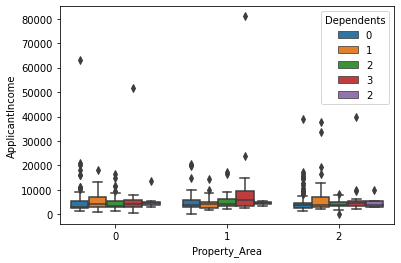

In [86]:
sns.boxplot(x="Property_Area",y="ApplicantIncome",hue="Dependents",data=trainpredx)

In [87]:
categoricalfeatures=[f for f in trainpredx.columns if trainpredx[f].dtype=='O'
                    ]

In [88]:
categoricalfeatures

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:>

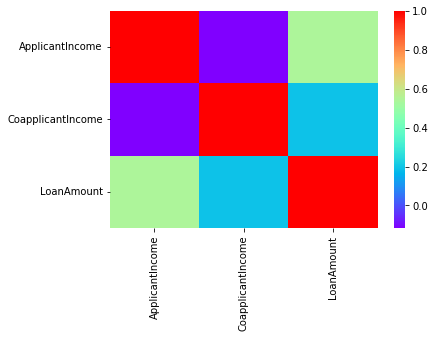

In [89]:
sns.heatmap(trainpredx.corr(method='pearson'),cmap='rainbow')

<AxesSubplot:>

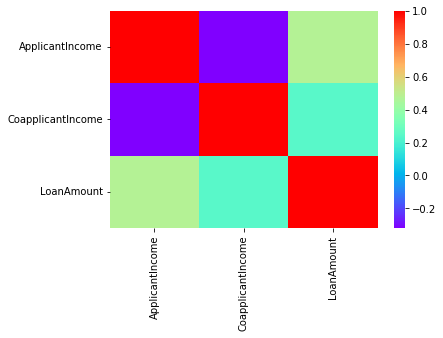

In [90]:
sns.heatmap(trainpredx.corr(method='spearman'),cmap='rainbow')

In [91]:
testpred =pd.read_csv('testpred.csv')


In [92]:
trainpredx.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
testpredx.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [94]:
trainpredx.LoanAmount.fillna(0)

0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [95]:
trainpredx.LoanAmount=trainpredx.LoanAmount.fillna(0)

In [96]:
trainpredx.LoanAmount.isnull().sum()

0

In [97]:
testpredx.LoanAmount.isnull().sum()

0

In [98]:
trainpredx

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0      0.0     0.0          0         1           0.0             5849   
1      0.0     1.0          1         1           0.0             4583   
2      0.0     1.0          0         1           1.0             3000   
3      0.0     1.0          0         0           0.0             2583   
4      0.0     0.0          0         1           0.0             6000   
..     ...     ...        ...       ...           ...              ...   
609    1.0     0.0          0         1           0.0             2900   
610    0.0     1.0          3         1           0.0             4106   
611    0.0     1.0          1         1           0.0             8072   
612    0.0     1.0          2         1           0.0             7583   
613    1.0     0.0          0         1           1.0             4583   

     CoapplicantIncome  LoanAmount Credit_History Property_Area Loan_Status  
0                  0.0         0.0            1.0             0           1  
1               1508.0       128.0            1.0             1           0  
2                  0.0        66.0            1.0             0           1  
3               2358.0       120.0            1.0             0           1  
4                  0.0       141.0            1.0             0           1  
..                 ...         ...            ...           ...         ...  
609                0.0        71.0            1.0             1           1  
610                0.0        40.0            1.0             1           1  
611              240.0       253.0            1.0             0           1  
612                0.0       187.0            1.0             0           1  
613                0.0       133.0            0.0             2           0  

[614 rows x 11 columns]

In [99]:
testpredx

Gender Married Dependents Education  Self_Employed  ApplicantIncome  \
0       0.0       1          0         1            0.0             5720   
1       0.0       1          1         1            0.0             3076   
2       0.0       1          2         1            0.0             5000   
3       0.0       1          2         1            0.0             2340   
4       0.0       0          0         0            0.0             3276   
..      ...     ...        ...       ...            ...              ...   
362     0.0       1          3         0            1.0             4009   
363     0.0       1          0         1            0.0             4158   
364     0.0       0          0         1            0.0             3250   
365     0.0       1          0         1            0.0             5000   
366     0.0       0          0         1            1.0             9200   

     CoapplicantIncome  LoanAmount  Credit_History Property_Area  
0                    0       110.0             1.0             0  
1                 1500       126.0             1.0             0  
2                 1800       208.0             1.0             0  
3                 2546       100.0             2.0             0  
4                    0        78.0             1.0             0  
..                 ...         ...             ...           ...  
362               1777       113.0             1.0             0  
363                709       115.0             1.0             0  
364               1993       126.0             2.0             2  
365               2393       158.0             1.0             1  
366                  0        98.0             1.0             1  

[367 rows x 10 columns]

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainpredx[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=sc.fit_transform(trainpred[['ApplicantIncome','CoapplicantIncome','LoanAmount']].values)
testpredx[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=sc.fit_transform(testpred[['ApplicantIncome','CoapplicantIncome','LoanAmount']].values)

In [101]:
!pip install scikit-plot

In [102]:
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [103]:
xtrain1= trainpredx.drop('Loan_Status',axis=1)
ytrain1=trainpredx['Loan_Status']
ytrain1=ytrain1.astype(int)

## NN not converging 
- investigating hyperparameter issue
- cache from prev training? it was converging before
- hyperparamter threshold violated previously
## update 
- converges @ 3000 after remvoing other HP's
## update 2 
- not convering @ 3000 after adding

for K Nearest Neighborsthe tuned hyperparameters :(best parameters)  {'leaf_size': 20, 'n_neighbors': 10}
for K Nearest Neighborsthe tuned hyperparameters :(best parameters)  {'leaf_size': 20, 'n_neighbors': 10}
for K Nearest Neighborsthe tuned hyperparameters :(best parameters)  {'leaf_size': 20, 'n_neighbors': 10}
for K Nearest Neighborsthe tuned hyperparameters :(best parameters)  {'leaf_size': 20, 'n_neighbors': 5}
for K Nearest Neighborsthe tuned hyperparameters :(best parameters)  {'leaf_size': 20, 'n_neighbors': 15}
for Linear SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scikitplot/metrics.py:405: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=figsize)


for Linear SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for Linear SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for Linear SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for Linear SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for RBF SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for RBF SVMthe tuned hyperparameters :(best parameters)  {'C': 1.06, 'gamma': 1}
for RBF SVMthe tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 1}
for RBF SVMthe tuned hyperparameters :(best parameters)  {'C': 1.5, 'gamma': 1}
for RBF SVMthe tuned hyperparameters :(best parameters)  {'C': 1.06, 'gamma': 1}
for Gaussian Processthe tuned hyperparameters :(best parameters)  {'max_iter_predict': 100}
for Gaussian Processthe tuned hyperparameters :(best parameters)  {'max_iter_predict': 100}
for Gaussian Processthe tuned hyperparameters :(best parameters)  {'max_iter_predi

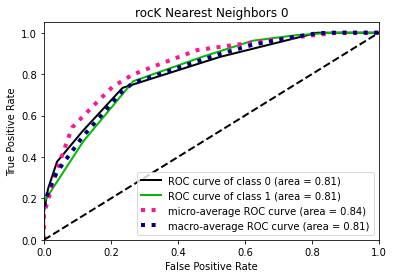

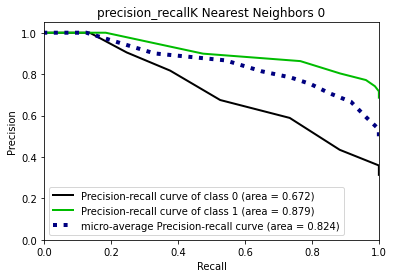

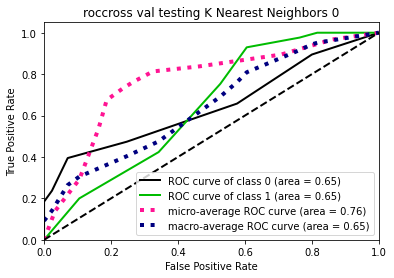

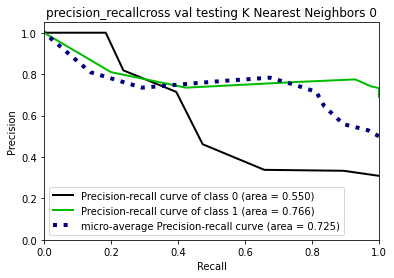

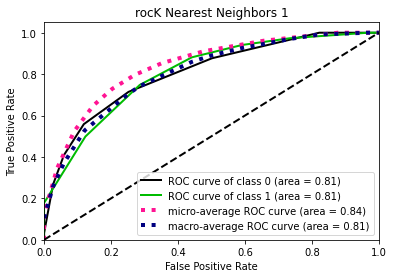

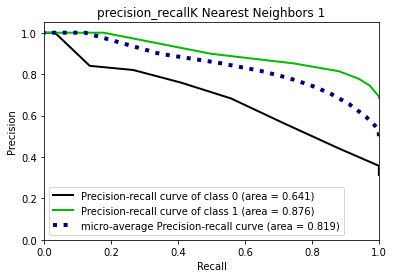

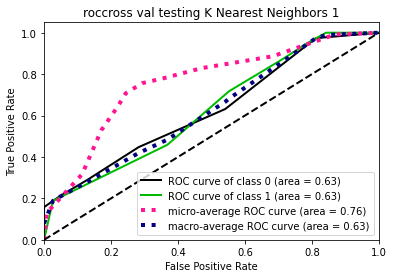

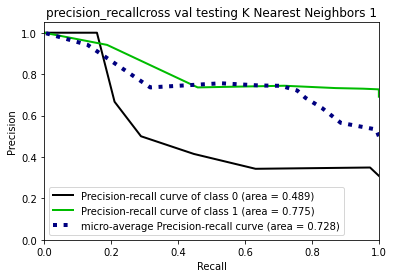

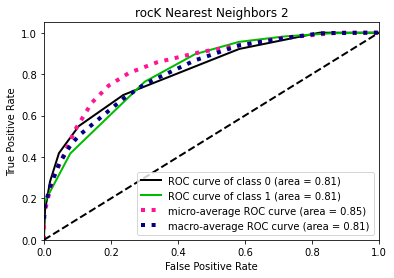

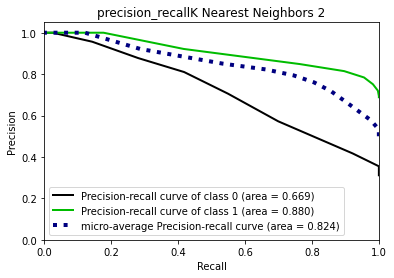

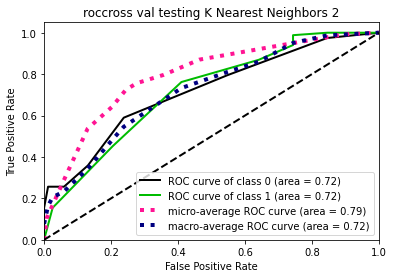

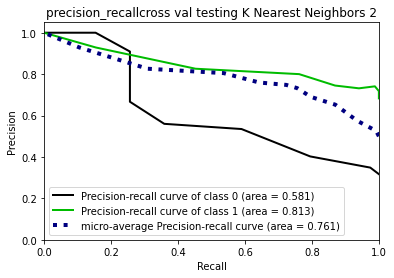

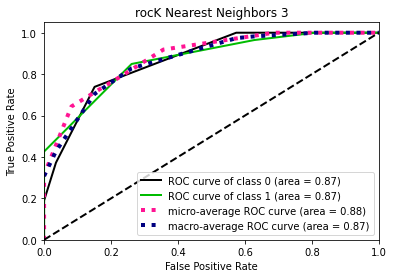

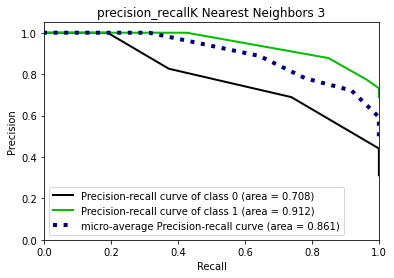

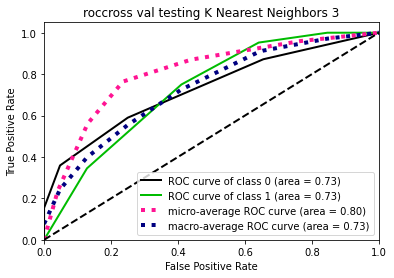

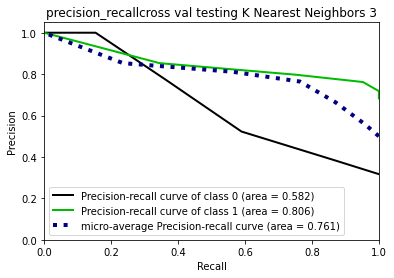

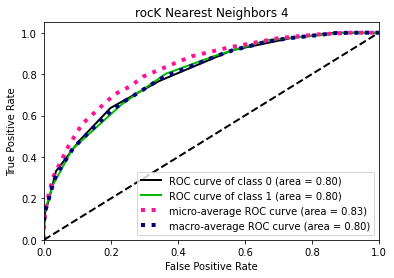

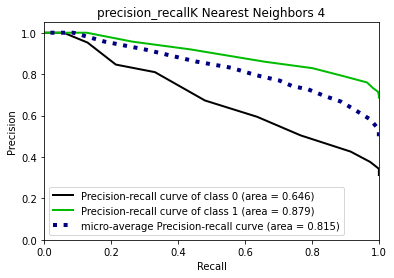

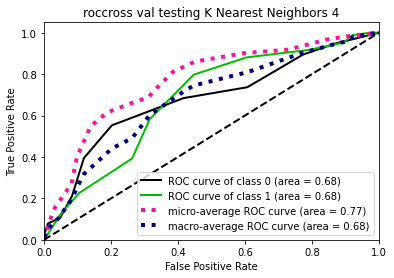

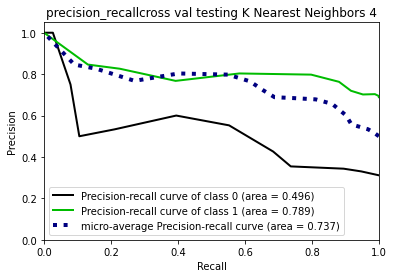

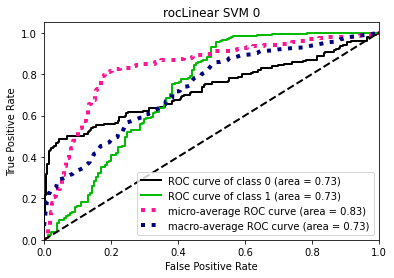

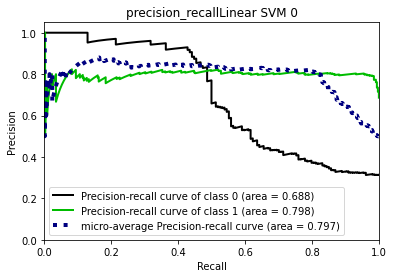

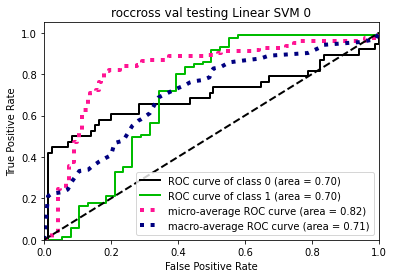

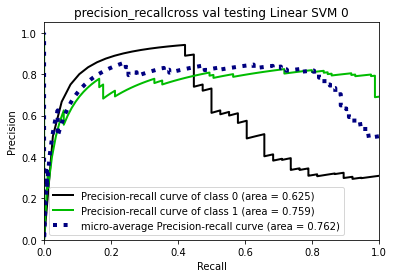

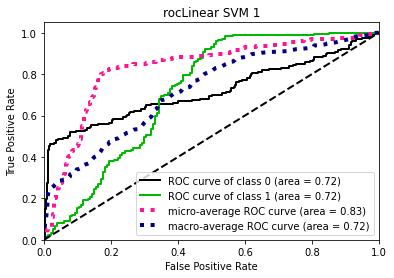

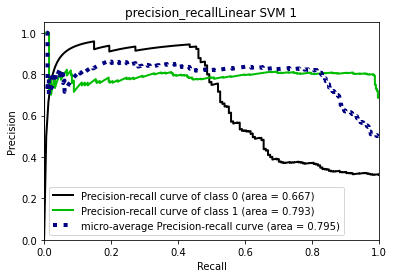

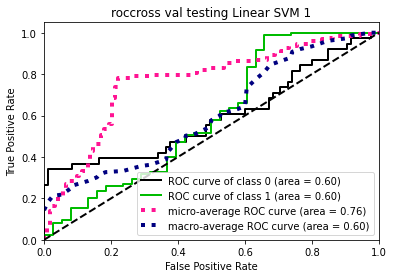

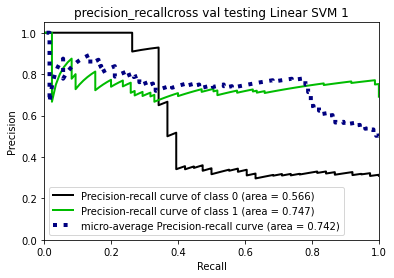

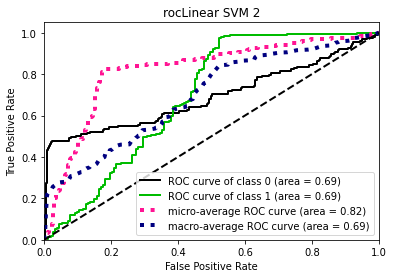

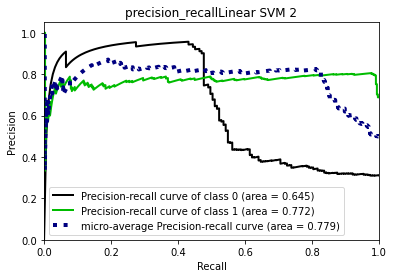

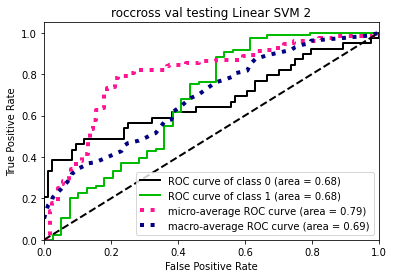

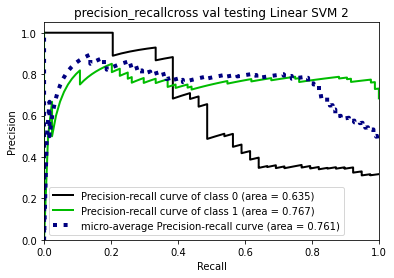

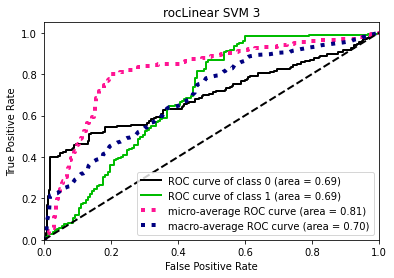

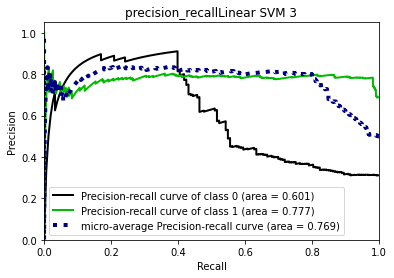

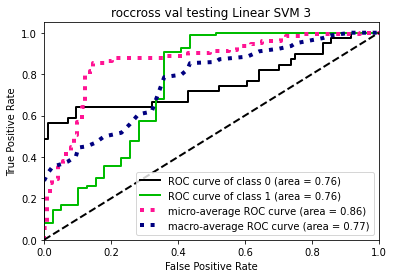

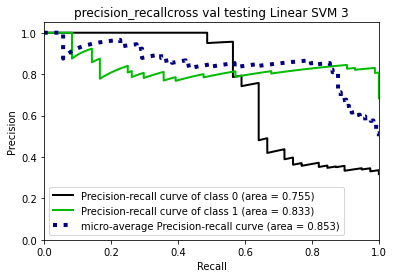

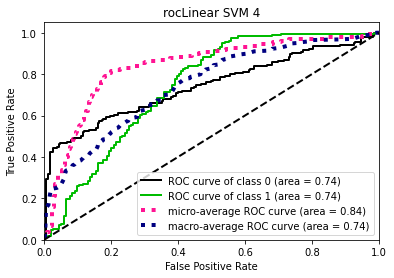

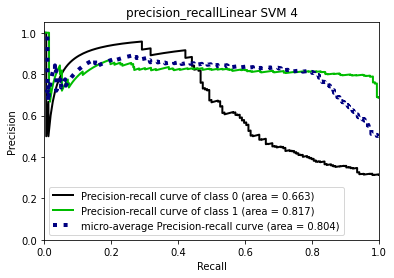

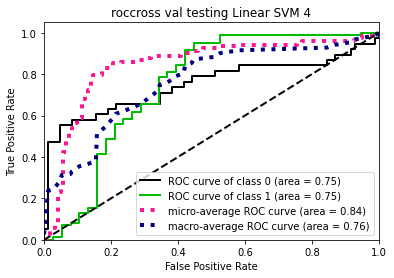

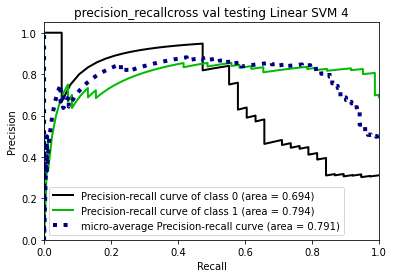

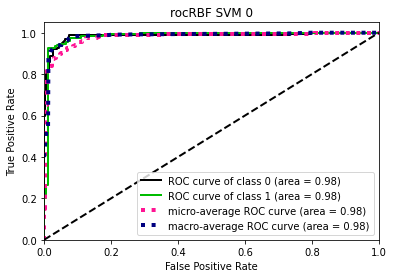

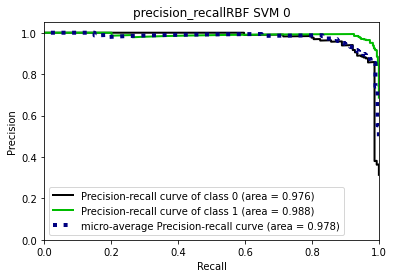

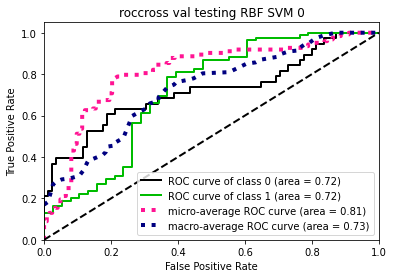

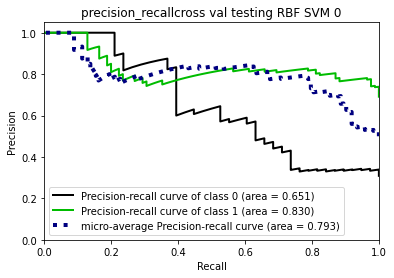

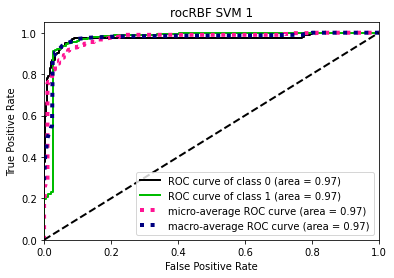

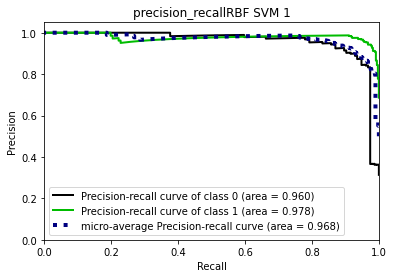

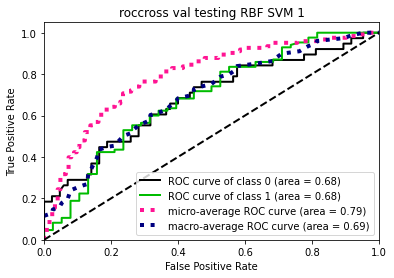

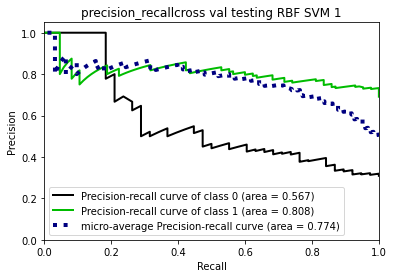

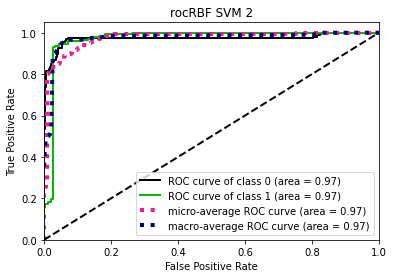

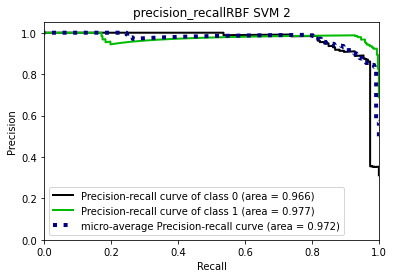

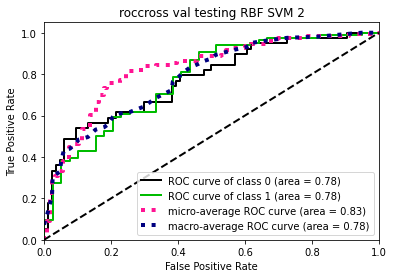

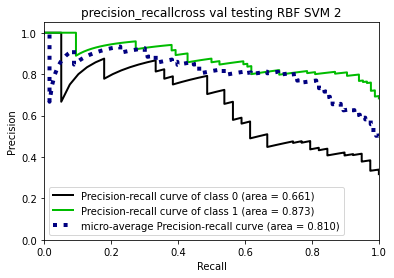

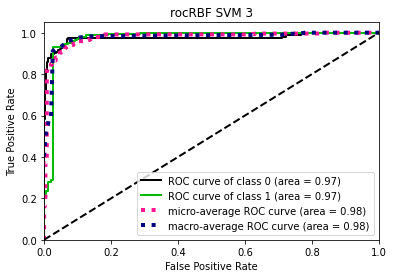

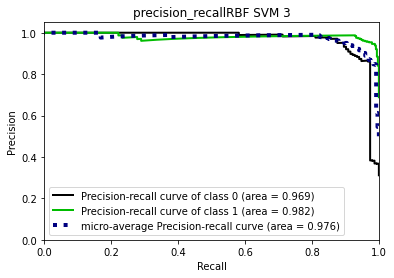

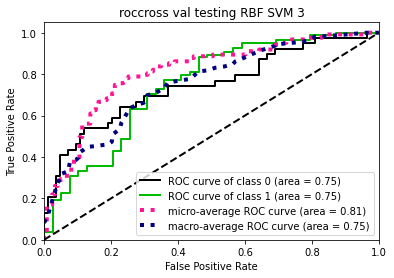

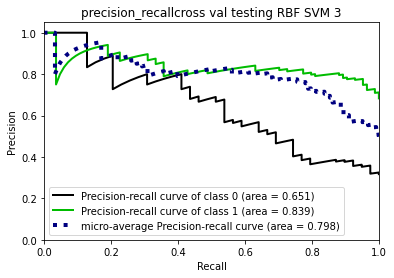

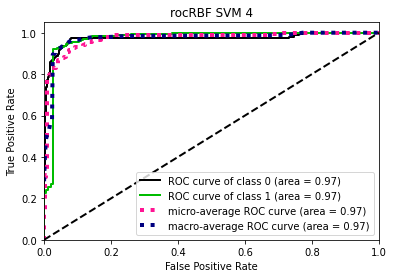

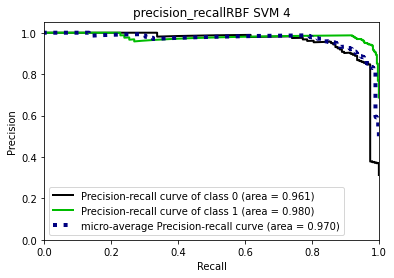

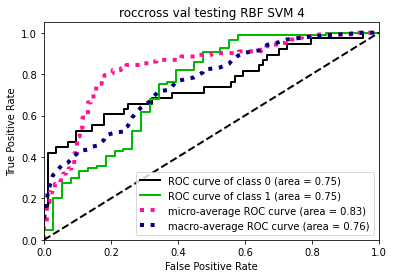

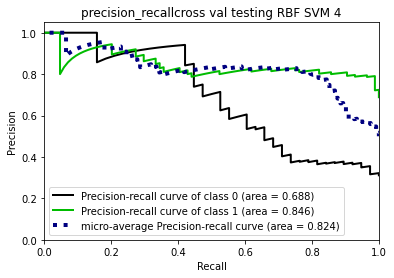

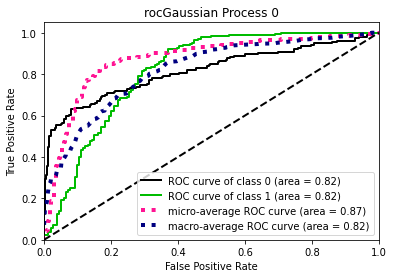

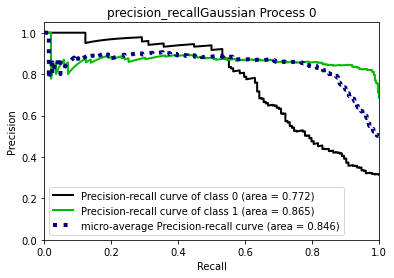

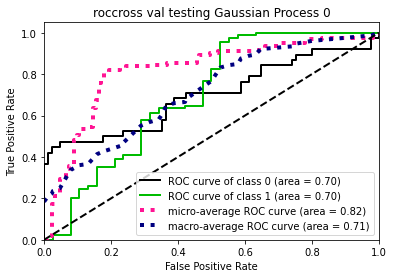

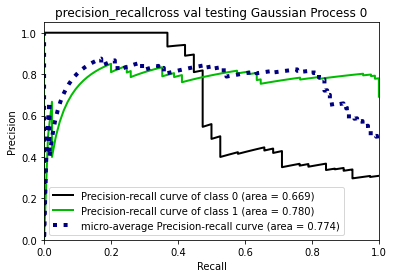

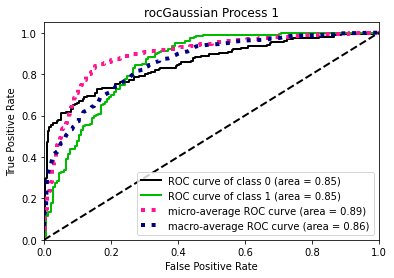

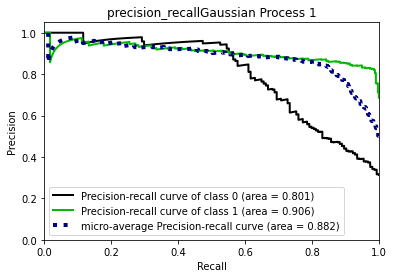

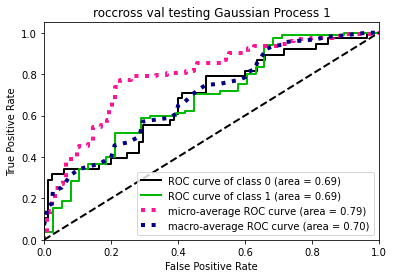

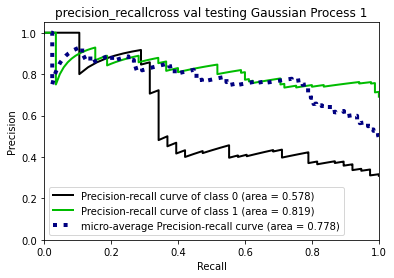

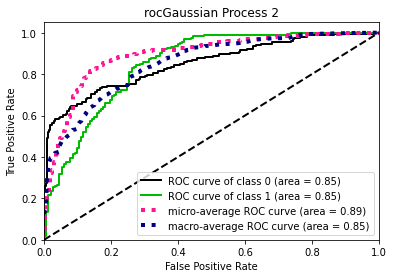

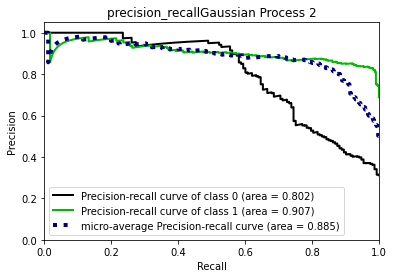

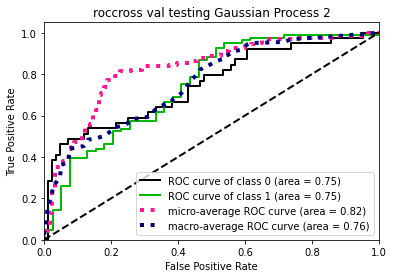

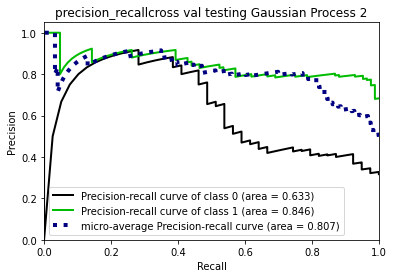

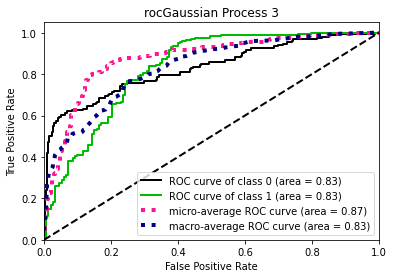

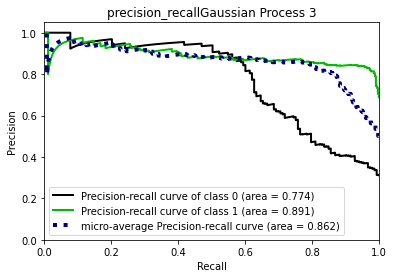

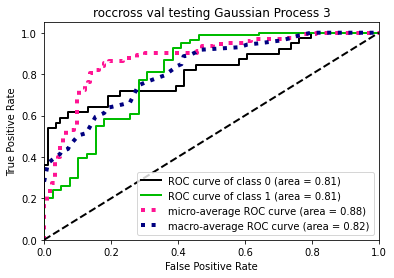

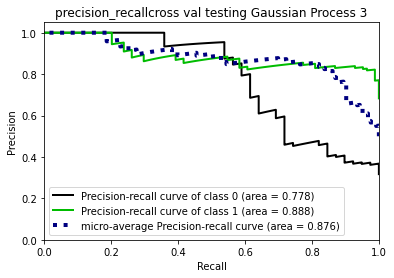

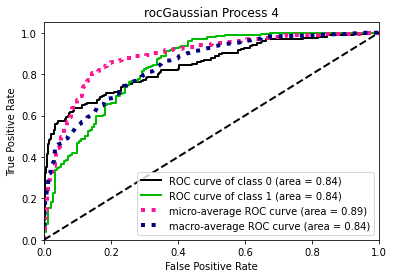

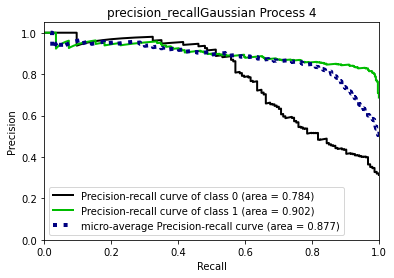

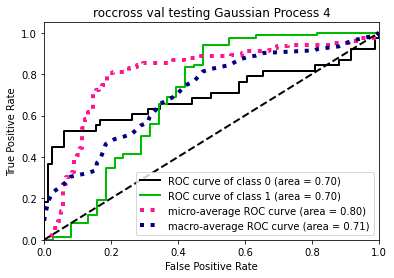

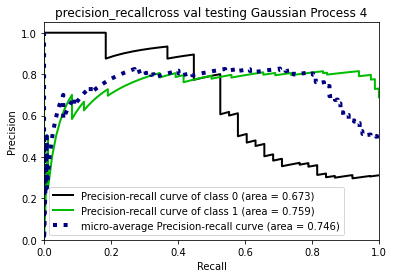

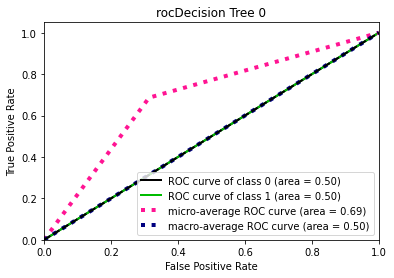

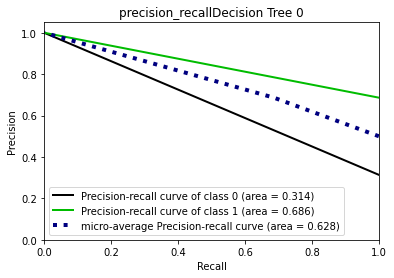

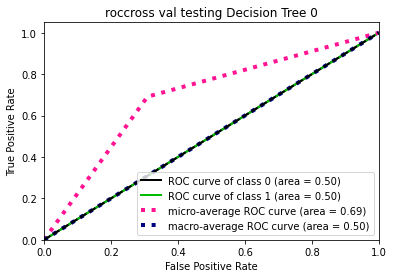

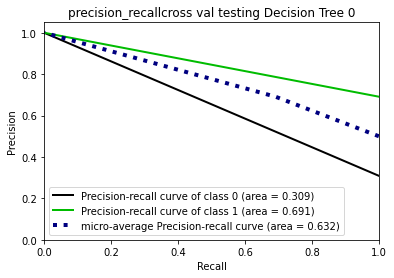

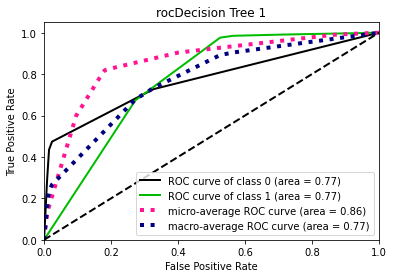

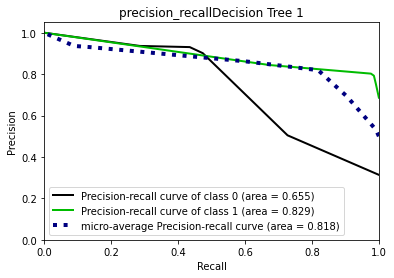

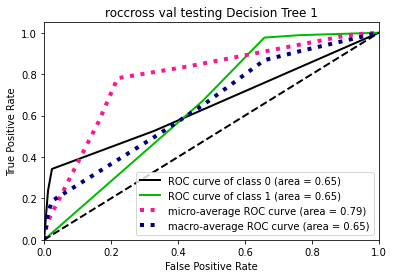

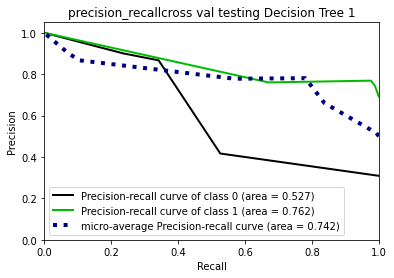

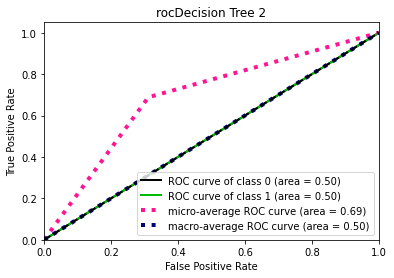

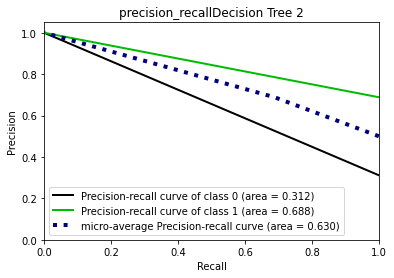

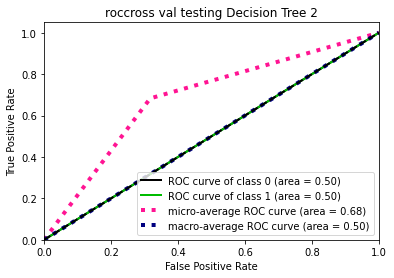

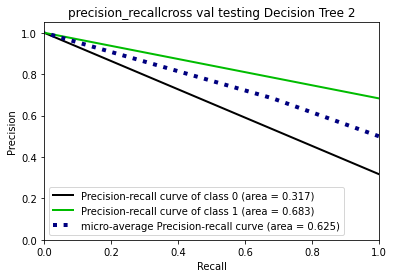

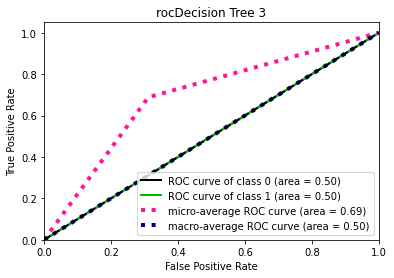

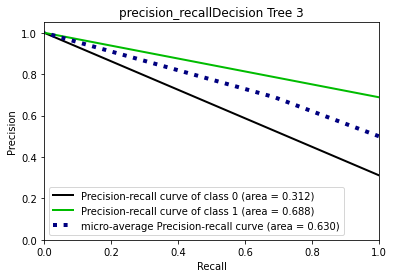

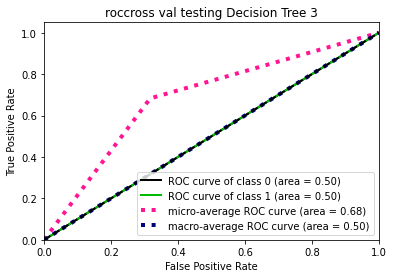

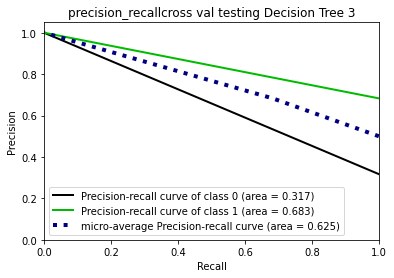

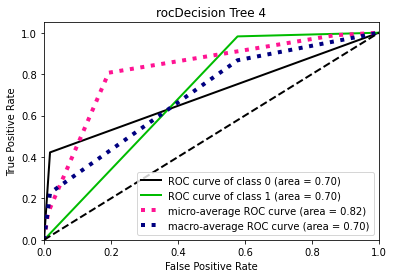

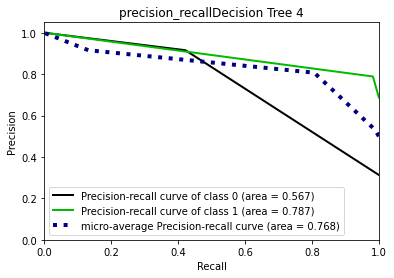

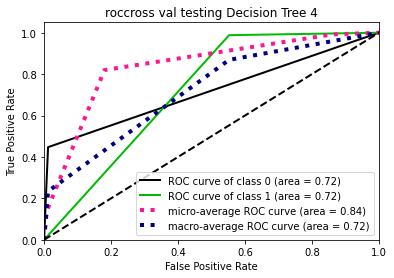

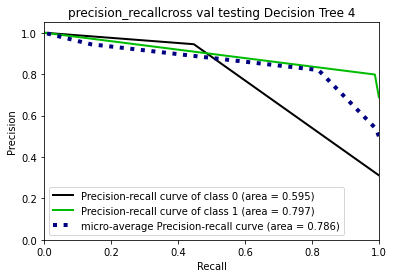

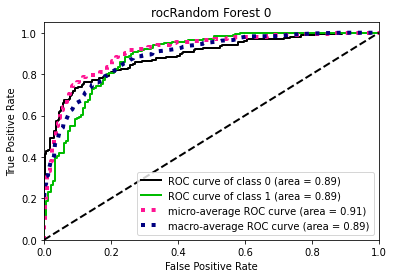

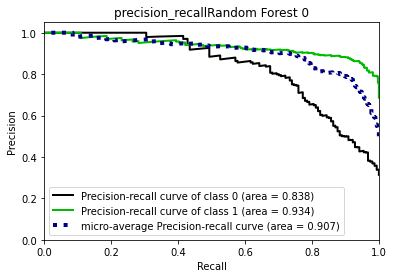

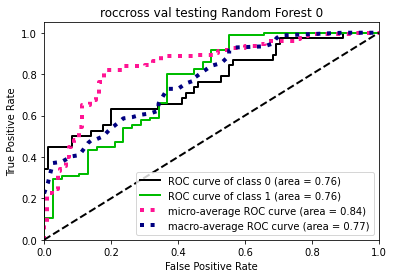

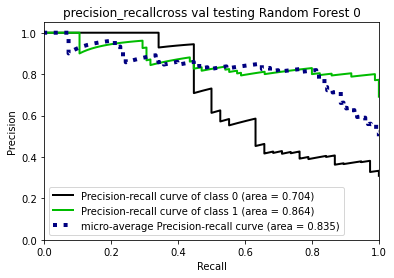

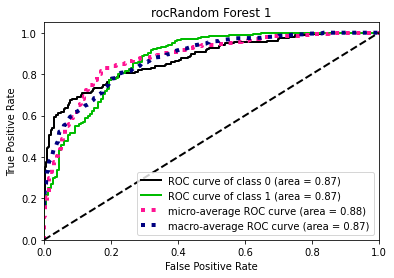

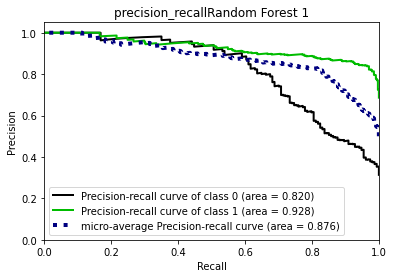

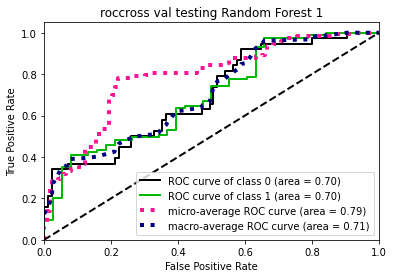

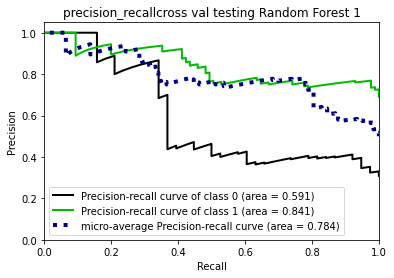

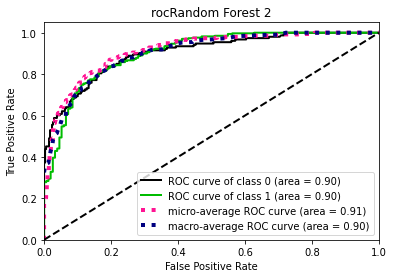

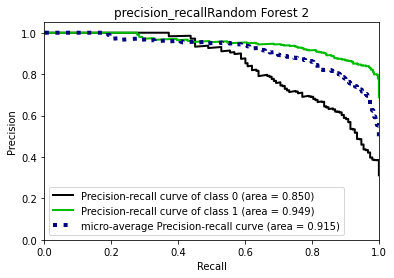

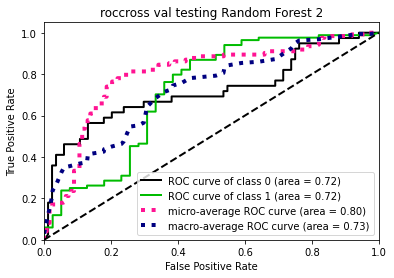

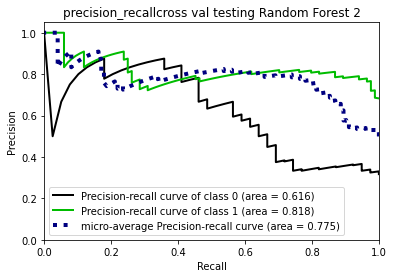

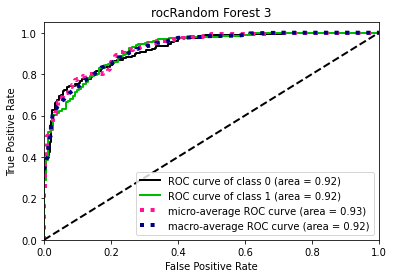

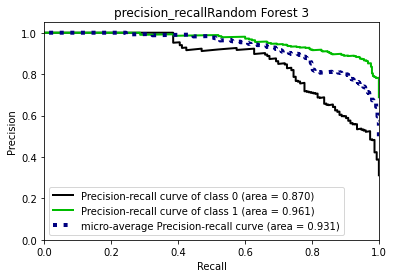

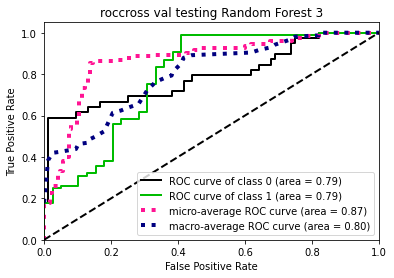

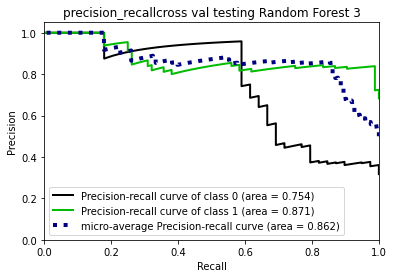

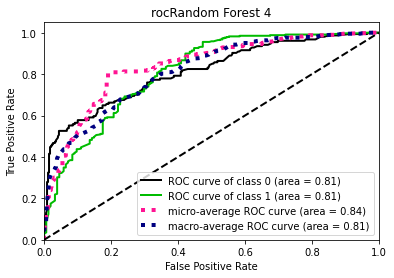

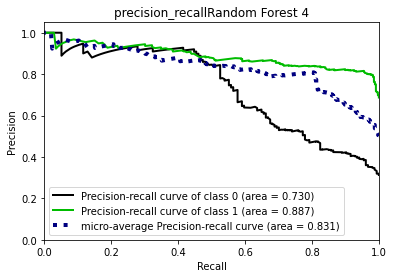

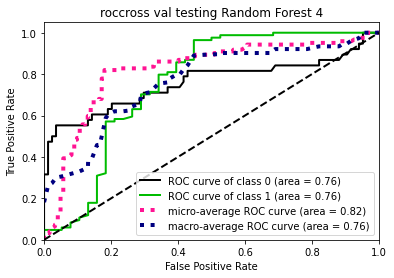

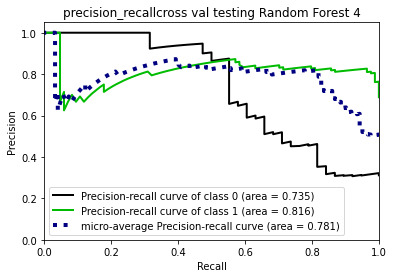

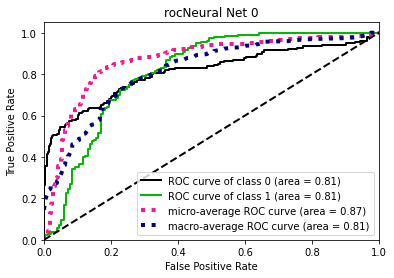

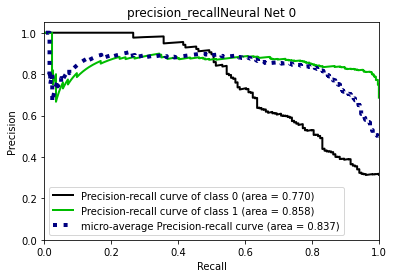

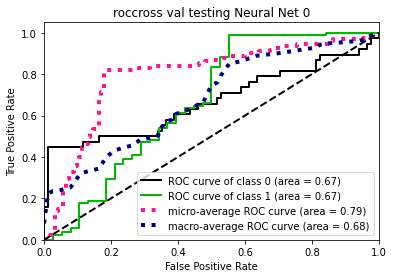

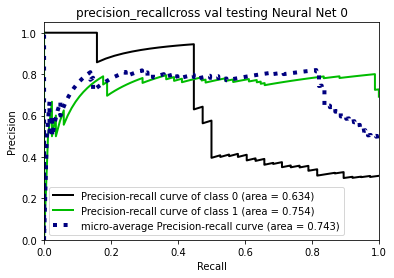

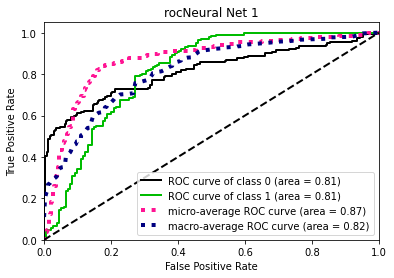

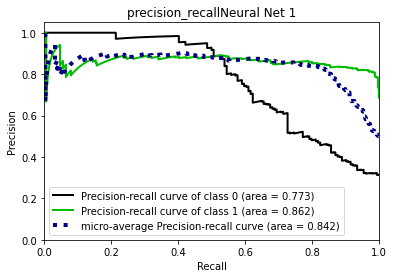

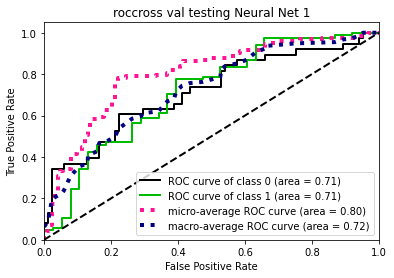

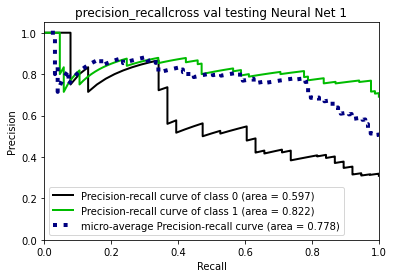

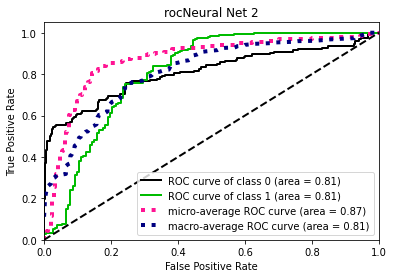

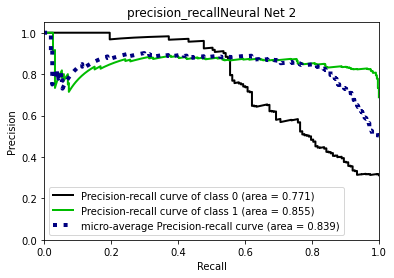

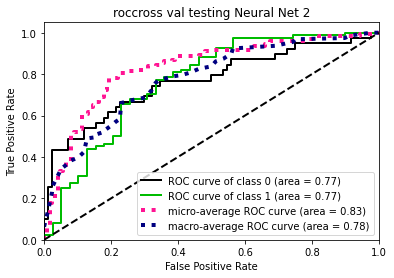

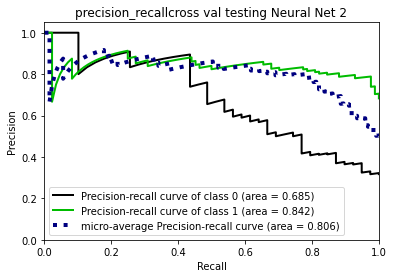

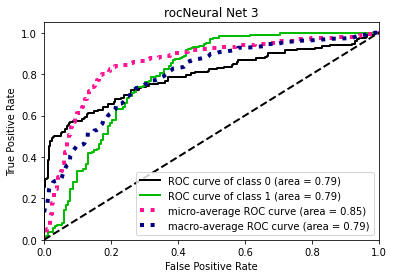

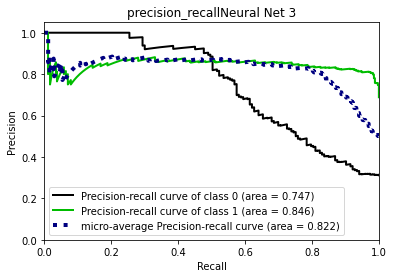

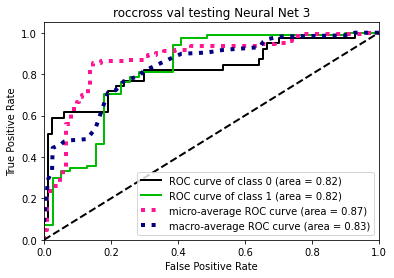

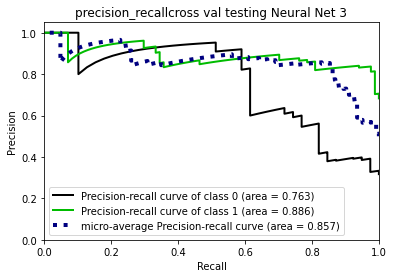

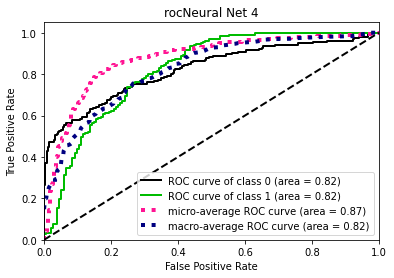

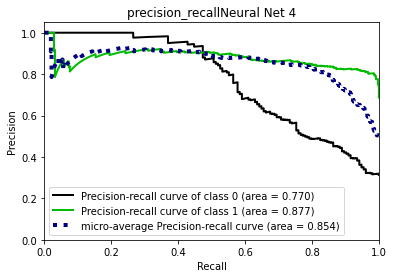

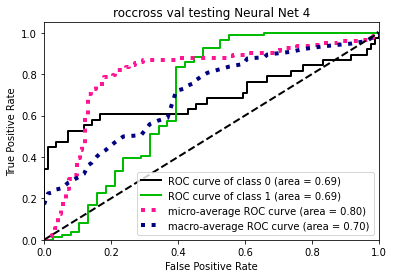

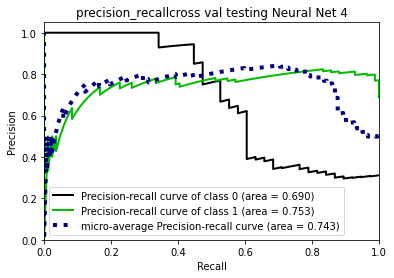

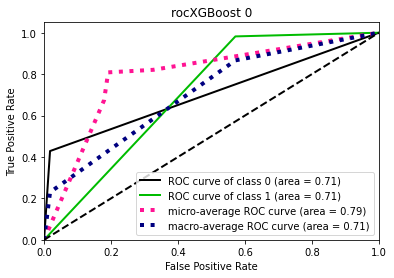

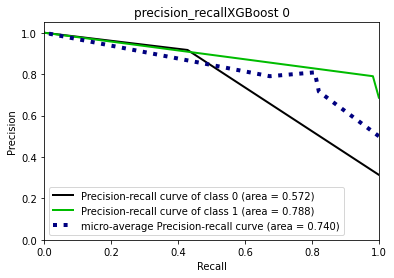

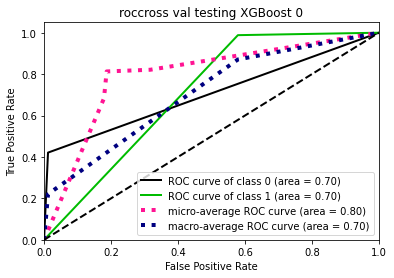

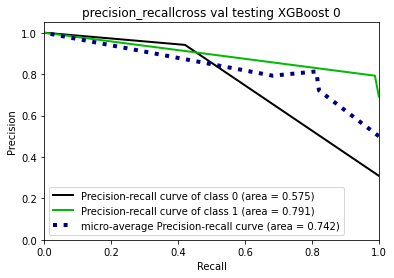

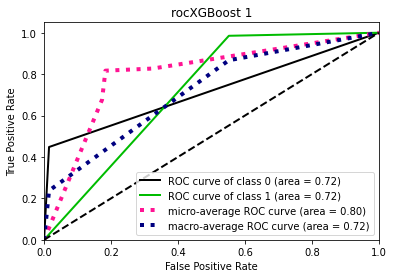

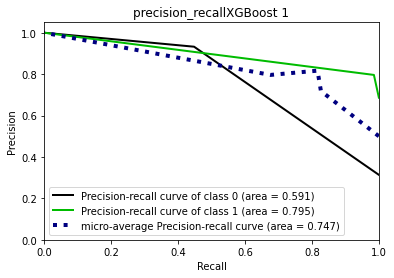

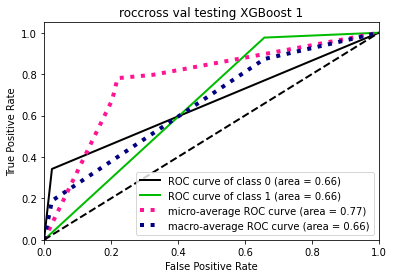

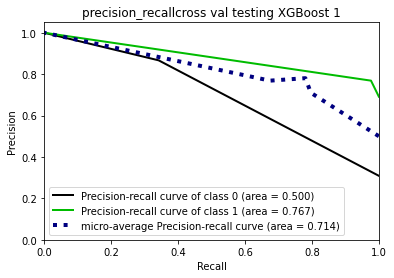

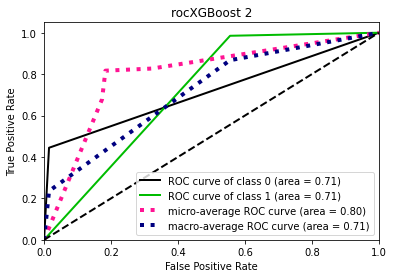

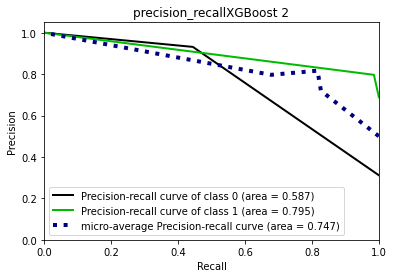

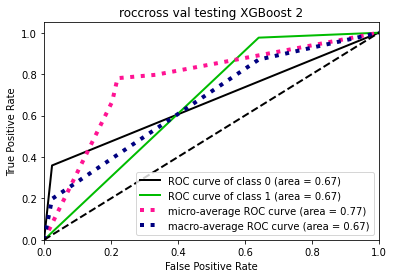

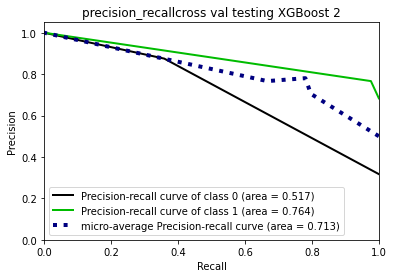

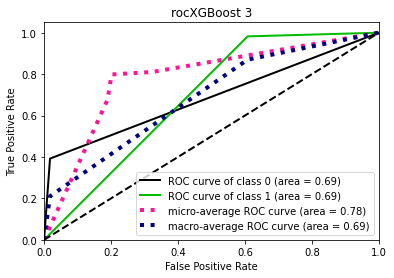

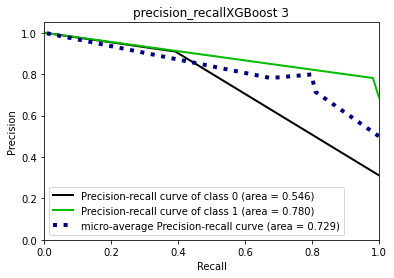

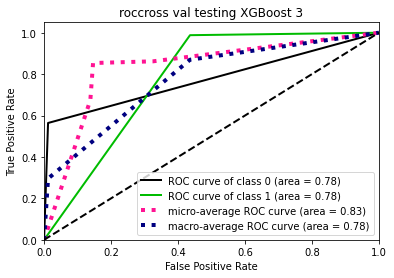

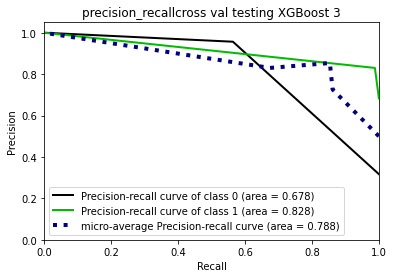

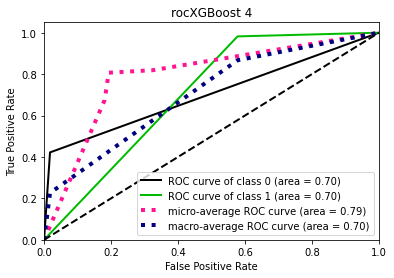

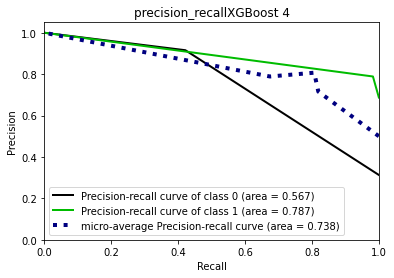

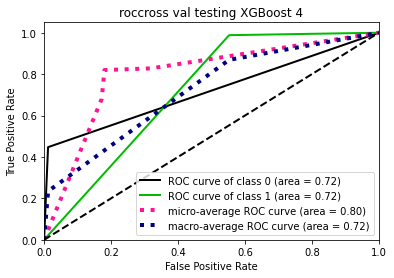

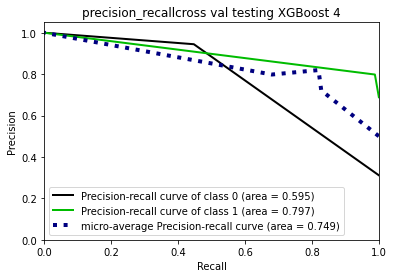

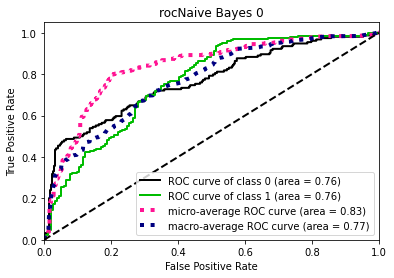

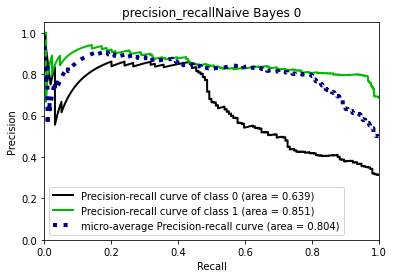

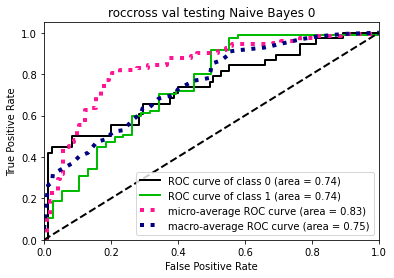

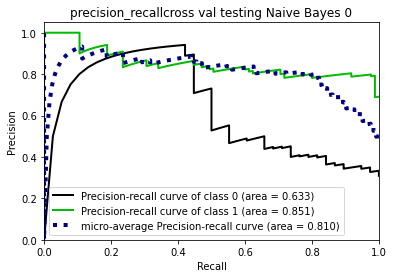

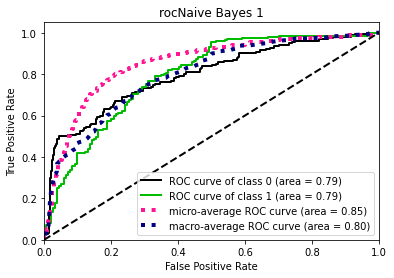

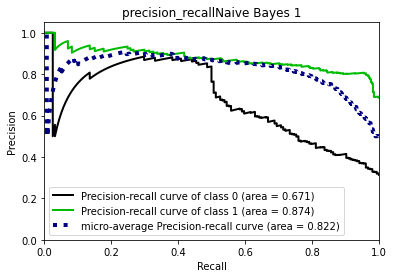

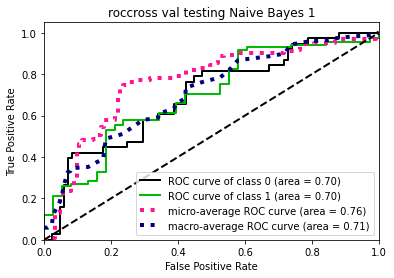

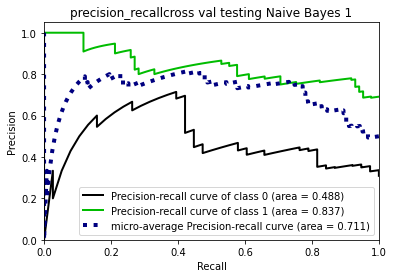

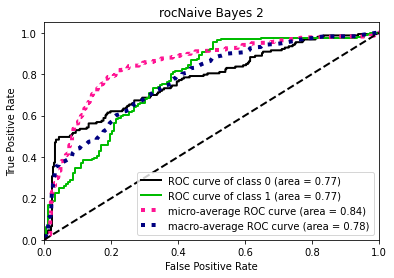

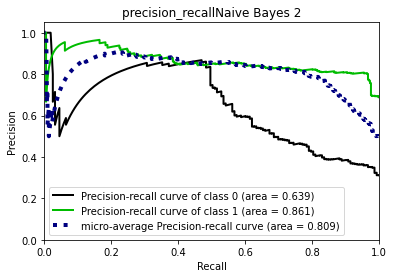

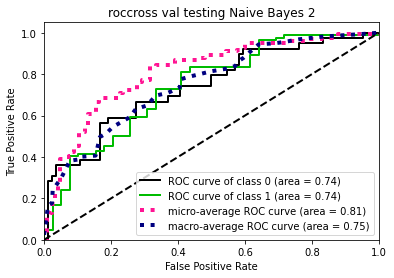

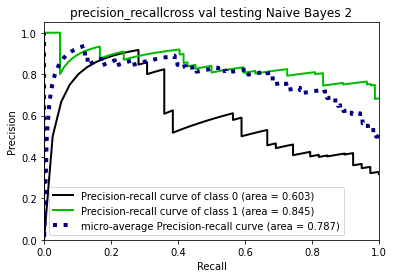

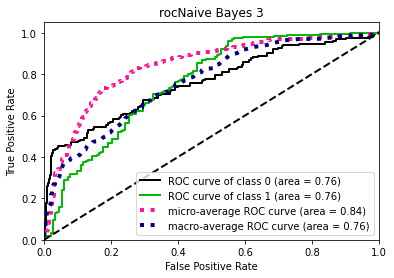

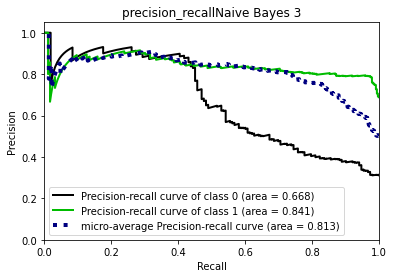

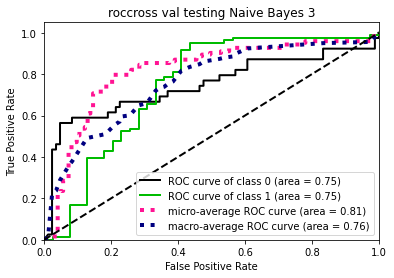

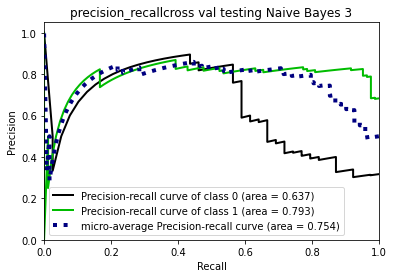

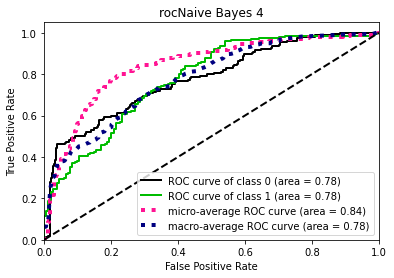

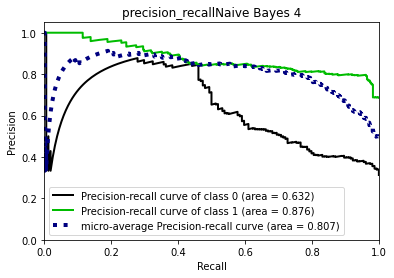

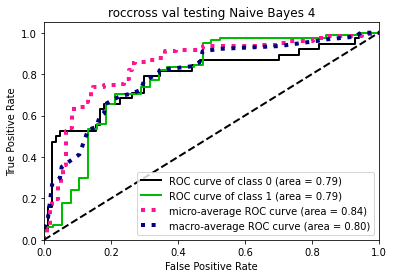

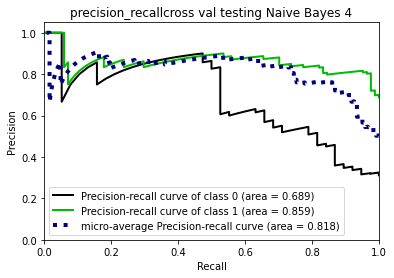

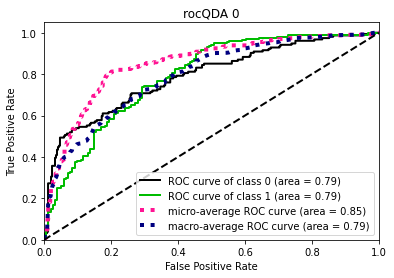

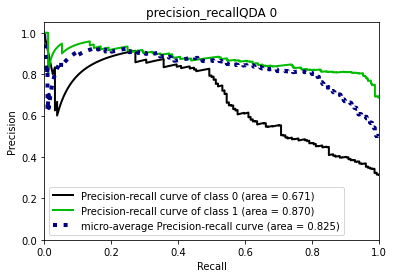

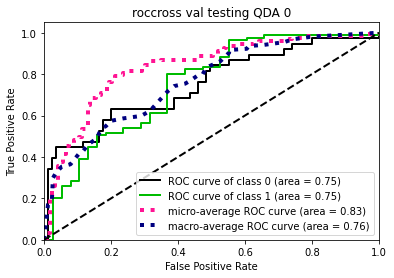

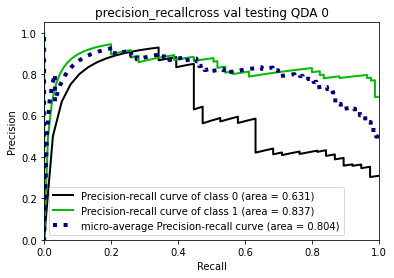

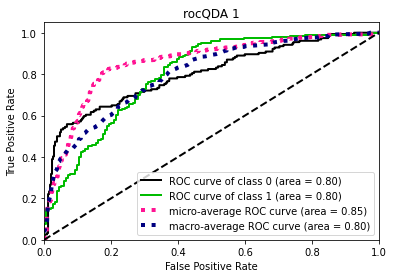

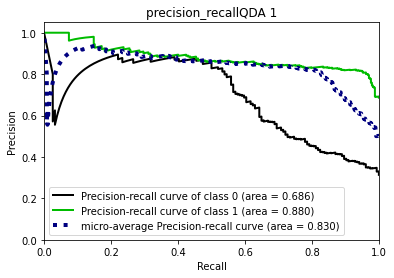

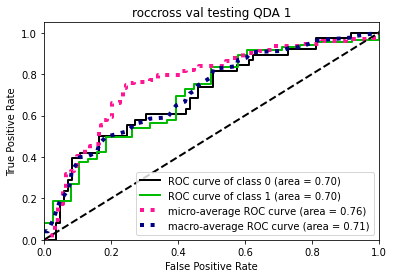

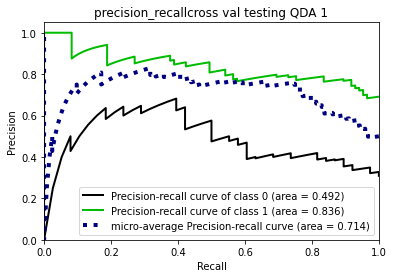

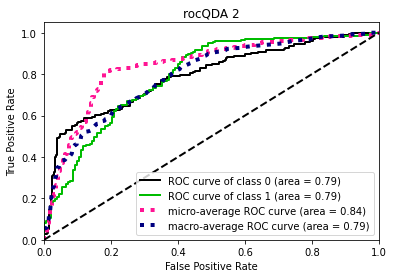

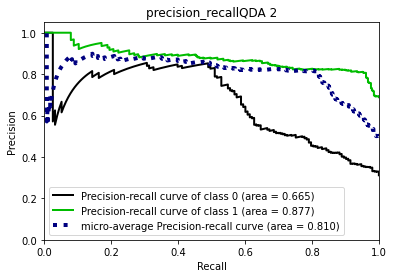

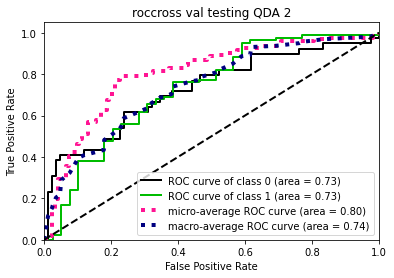

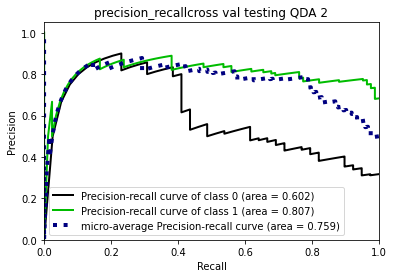

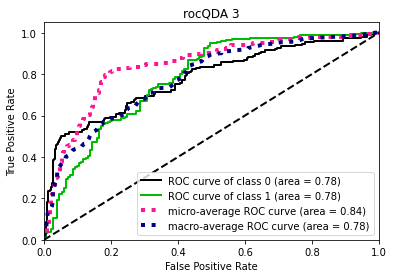

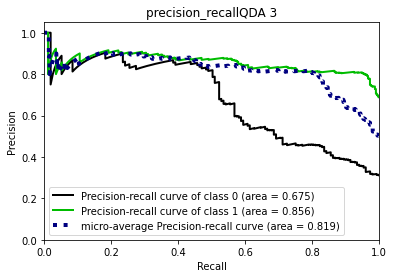

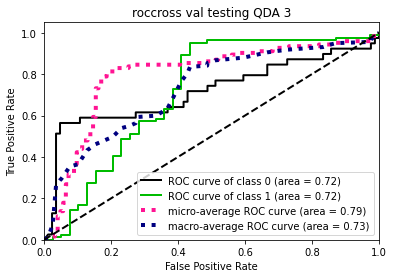

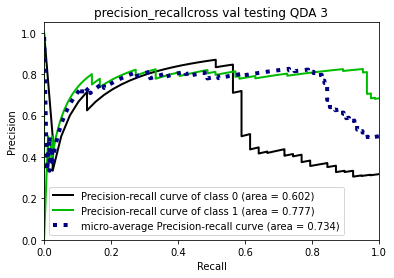

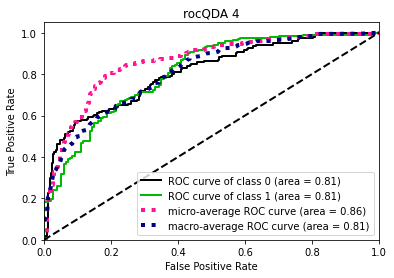

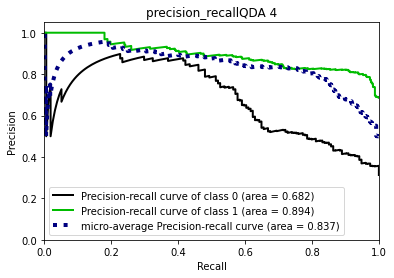

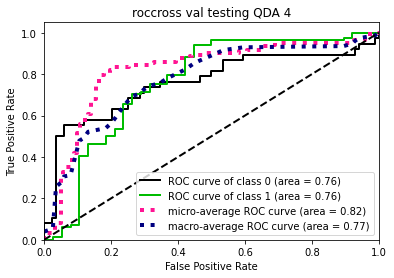

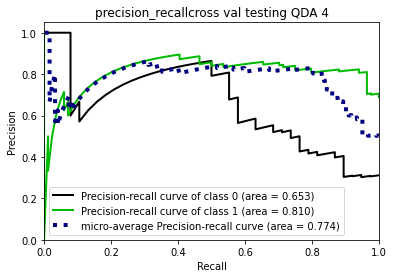

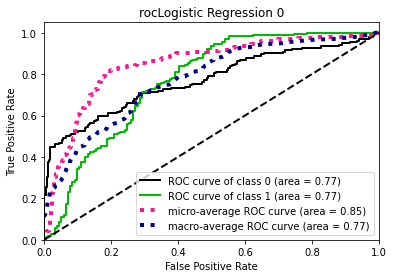

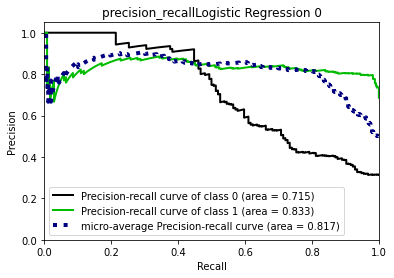

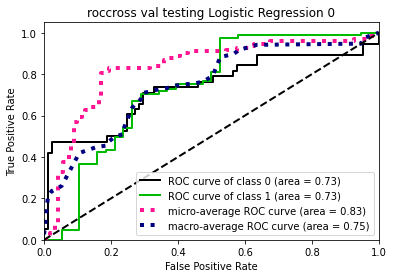

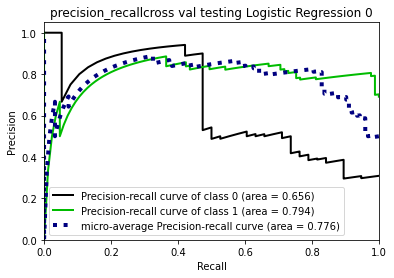

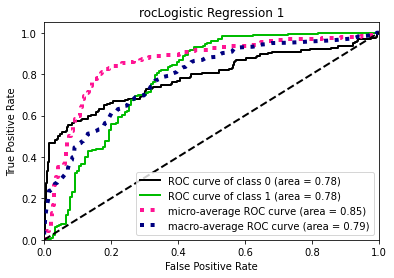

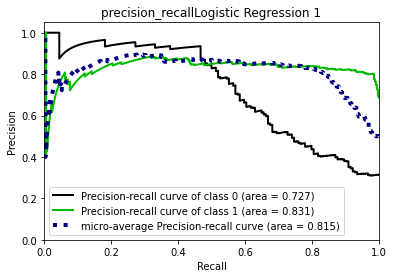

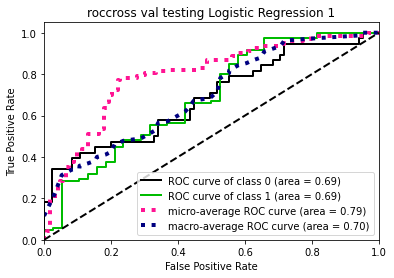

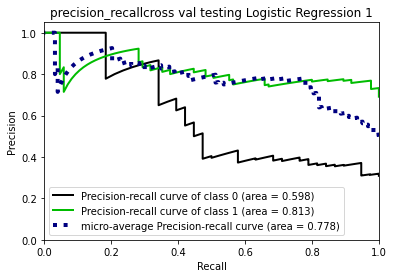

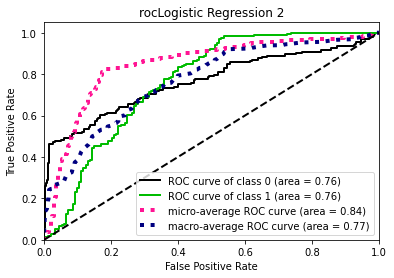

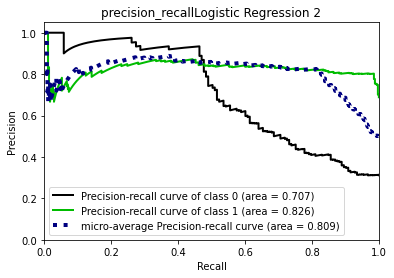

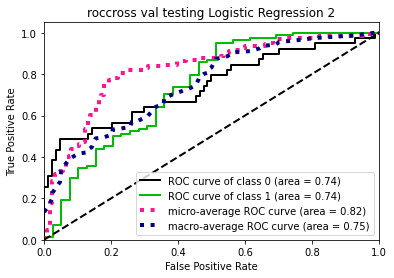

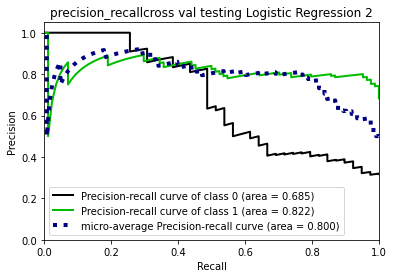

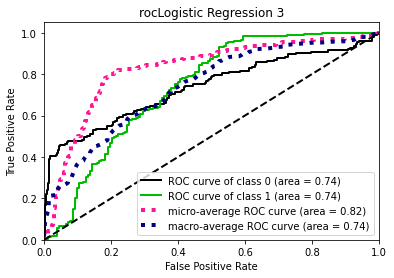

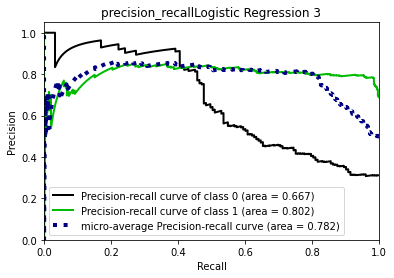

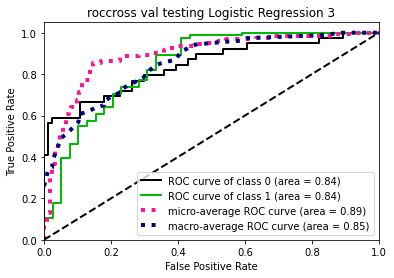

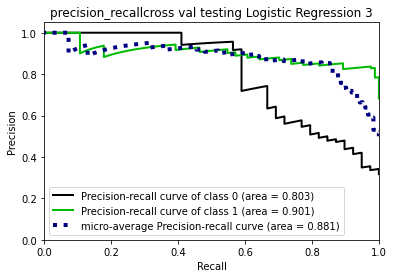

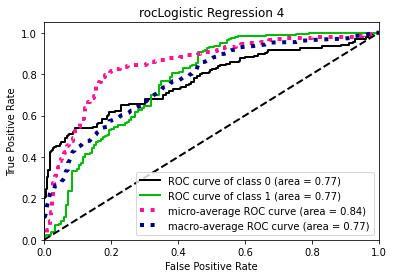

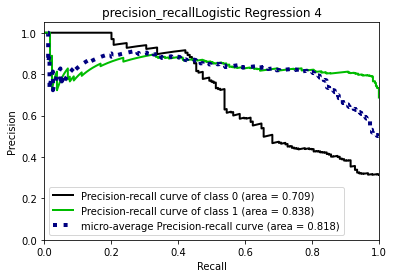

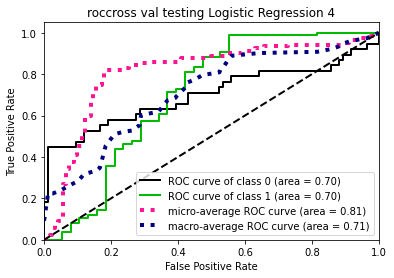

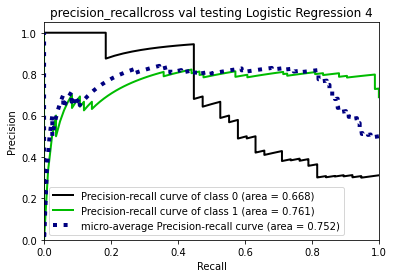

In [107]:
skf=StratifiedKFold(n_splits=5)
names = [
    'K Nearest Neighbors',
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "XGBoost",
    "Naive Bayes",
    "QDA",
    "Logistic Regression"
]

classifiers = [
    KNeighborsClassifier(algorithm='auto'),
    SVC(kernel="linear",probability=True),
    SVC(probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

massiveCV={'RBF SVM':{'C':[1.5,1.0,2.0,3.0,1.06],'gamma':[1,2,3,4]},
          'Decision Tree':{'max_depth':[4,5,6],'min_samples_split':[2,4,5,7],'ccp_alpha':[0.0,0.02,0.5,1.0],
                           'min_samples_leaf':[1,2,4,5],'max_leaf_nodes':[5,8,12,15],'max_features':[1,2,3]},
          'Random Forest':{'max_depth':[4,5,6],'min_samples_split':[2,4,5,7],'ccp_alpha':[0.0,0.02,0.5,1.0],
                           'min_samples_leaf':[1,2,4,5],'max_leaf_nodes':[5,8,12,15],'max_features':[1,2,3]},
          'Linear SVM':{'C':[1.5,1.0,2.0,3.0,1.06],'gamma':[1,2,3,4]},
          'Neural Net':{'max_iter':[3000],'learning_rate_init':np.arange(0.0001,0.0004,0.0001),
                        'alpha':np.arange(0.0001,0.0003,0.0001),
                        'momentum':np.arange(0.95,0.99,0.01),'tol':[0.0001],
                      'beta_1':np.arange(0.89,0.93,0.01),'beta_2':np.arange(0.89,0.93,0.01)},
          'Gaussian Process':{'max_iter_predict':[100,120,200]},
          'XGBoost':{'min_samples_split':[2,4,6],'ccp_alpha':[0.0,0.02,0.5,1.0],'min_samples_leaf':[1,2,4]},
          'Naive Bayes':{'var_smoothing':[1e-9,2e-9,3e-9]},
           'QDA':{'reg_param':[0,0.05,0.2,0.5]},
        'K Nearest Neighbors':{'n_neighbors':[5,10,15,26,30],'leaf_size':[20,30,40]},
        'Logistic Regression':{'C':[1.0,1.2,1.5,2.0]}
}
#xtest1= trainpredx.drop('Loan_Status',axis=1)
#ytest1=trainpredx['Loan_Status']
#ytest1=ytest1.astype(int)
# this is a competition and hence my results will be graded and I dont have access to the target testing data set y_test

models=[]
auctrain=[]
auctest=[]
for name, clf in zip(names, classifiers):
    for (train, test), i in zip(skf.split(xtrain1,ytrain1),range(0,5)):
        gcv=(GridSearchCV(clf,massiveCV[name],cv=4))
        fit=gcv.fit(xtrain1.iloc[train],ytrain1.iloc[train])
        print("for "+name+"the tuned hyperparameters :(best parameters) ",gcv.best_params_)
        probs1=gcv.predict_proba(xtrain1.iloc[train])
        skplt.metrics.plot_roc(ytrain1.iloc[train],probs1,title="roc"+name+" "+str(i))
        fpr1, tpr1, threshold1= roc_curve(ytrain1.iloc[train].values,probs1[:,1])
        auctrain.append(auc(fpr1,tpr1))
        skplt.metrics.plot_precision_recall(ytrain1.iloc[train],probs1,title="precision_recall"+name+" "+str(i))
        probs2=gcv.predict_proba(xtrain1.iloc[test])
        skplt.metrics.plot_roc(ytrain1.iloc[test],probs2,title="roc"+"cross val testing "+name+" "+str(i))
        fpr2, tpr2, threshold2= roc_curve(ytrain1.iloc[test].values,probs2[:,1])
        auctest.append(auc(fpr2,tpr2))
        skplt.metrics.plot_precision_recall(ytrain1.iloc[test],probs2,title="precision_recall"+"cross val testing "+name+" "+str(i))
        models.append(fit)

auctrain=np.array(auctrain)
auctrain.shape=(5,len(names))
resauctrain=pd.DataFrame(auctrain)
resauctrain.columns=names
resauctrain.index=["Strat KFold for "+str(f) for f in resauctrain.index ]


auctest=np.array(auctest)
auctest.shape=(5,len(names))
resauctest=pd.DataFrame(auctest)
resauctest.columns=names
resauctest.index=["Strat KFold for "+str(f) for f in resauctest.index ]

In [108]:
resauctrain

K Nearest Neighbors  Linear SVM   RBF SVM  \
Strat KFold for 0             0.813056    0.805715  0.812730   
Strat KFold for 1             0.970192    0.971400  0.974282   
Strat KFold for 2             0.500000    0.500000  0.702163   
Strat KFold for 3             0.792358    0.821294  0.705384   
Strat KFold for 4             0.776243    0.789973  0.798258   

                   Gaussian Process  Decision Tree  Random Forest  Neural Net  \
Strat KFold for 0          0.867889       0.799940       0.726964    0.717754   
Strat KFold for 1          0.971394       0.815908       0.852461    0.850273   
Strat KFold for 2          0.886913       0.873001       0.903131    0.921723   
Strat KFold for 3          0.716608       0.714826       0.687203    0.702163   
Strat KFold for 4          0.791468       0.777855       0.807923    0.769509   

                    XGBoost  Naive Bayes       QDA  Logistic Regression  
Strat KFold for 0  0.691360     0.692482  0.741605             0.983140  
Strat KFold for 1  0.829775     0.841082  0.500000             0.770993  
Strat KFold for 2  0.812457     0.812575  0.812787             0.808601  
Strat KFold for 3  0.764789     0.793537  0.772982             0.757648  
Strat KFold for 4  0.782574     0.764571  0.736010             0.769077

In [109]:
resauctest

K Nearest Neighbors  Linear SVM   RBF SVM  \
Strat KFold for 0             0.645820    0.628173  0.717796   
Strat KFold for 1             0.684365    0.775336  0.745116   
Strat KFold for 2             0.500000    0.500000  0.717732   
Strat KFold for 3             0.822650    0.692356  0.704644   
Strat KFold for 4             0.788534    0.750464  0.700929   

                   Gaussian Process  Decision Tree  Random Forest  Neural Net  \
Strat KFold for 0          0.727106       0.678885       0.696285    0.595356   
Strat KFold for 1          0.751253       0.698762       0.686378    0.748168   
Strat KFold for 2          0.760991       0.696904       0.718101    0.790598   
Strat KFold for 3          0.659288       0.667582       0.776099    0.717732   
Strat KFold for 4          0.727411       0.716117       0.760025    0.733437   

                    XGBoost  Naive Bayes       QDA  Logistic Regression  
Strat KFold for 0  0.675214     0.755800  0.748747             0.719505  
Strat KFold for 1  0.813797     0.698935  0.500000             0.649381  
Strat KFold for 2  0.758145     0.666563  0.714861             0.767399  
Strat KFold for 3  0.743034     0.696904  0.740537             0.745116  
Strat KFold for 4  0.685449     0.740232  0.842796             0.700188

In [111]:
models
## all of the models can be accessed through this array

[GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
              param_grid={'leaf_size': [20, 30, 40],
                          'n_neighbors': [5, 10, 15, 26, 30]}),
 GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
              param_grid={'leaf_size': [20, 30, 40],
                          'n_neighbors': [5, 10, 15, 26, 30]}),
 GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
              param_grid={'leaf_size': [20, 30, 40],
                          'n_neighbors': [5, 10, 15, 26, 30]}),
 GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
              param_grid={'leaf_size': [20, 30, 40],
                          'n_neighbors': [5, 10, 15, 26, 30]}),
 GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
              param_grid={'leaf_size': [20, 30, 40],
                          'n_neighbors': [5, 10, 15, 26, 30]}),
 GridSearchCV(cv=4, estimator=SVC(kernel='linear', probability=True),
              param_grid={'C': [1.5, 1.0, 2.0, 3.0, 1.06],
                

In [ ]:
#!pip install gpytorch

In [1]:
import torch
import gpytorch

In [104]:
from gpytorch.models import ApproximateGP
from gpytorch.variational import CholeskyVariationalDistribution
from gpytorch.variational import VariationalStrategy

class GPClassificationModel(ApproximateGP):
    def __init__(self, train_x):
        var_dist= CholeskyVariationalDistribution(train_x.size(0))
        var_strat= VariationalStrategy(self,train_x,var_dist, learn_inducing_locations=True)
        super(GPClassificationModel,self).__init__(var_strat)
        self.mean_module= gpytorch.means.ConstantMean()
        self.covar_module=gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self,x):
        mean_x=self.mean_module(x)
        covar_x=self.covar_module(x)
        latent_pred=gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
        return latent_pred

In [105]:
xtrain1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    object 
 9   Property_Area      614 non-null    object 
dtypes: float64(3), object(7)
memory usage: 48.1+ KB


In [106]:
categoricalfeat=[f for f in xtrain1.columns if xtrain1[f].dtype=='O']
xtrain2=xtrain1.copy()
xtrain2[categoricalfeat]=xtrain1[categoricalfeat].astype(float)

In [107]:
ytrain1=ytrain1.astype(float)



In [108]:
Xt = torch.from_numpy(xtrain2[0:514].values).float()
Xeval = torch.from_numpy(xtrain2[514:615].values).float()
yt=torch.from_numpy(ytrain1[0:514].values).float()
model = GPClassificationModel(Xt)
likelihood = gpytorch.likelihoods.BernoulliLikelihood()
training_iterations =  400
# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# "Loss" for GPs - the marginal log likelihood
# num_data refers to the number of training datapoints
mll = gpytorch.mlls.VariationalELBO(likelihood, 
                                    model, 
                                    yt.numel(), 
                                    combine_terms=False)

for i in range(training_iterations):
    # Zero backpropped gradients from previous iteration
    optimizer.zero_grad()
    # Get predictive output
    output = model(Xt)
    # Calc loss and backprop gradients
    log_lik, kl_div, log_prior = mll(output, yt)
    loss = -(log_lik - kl_div + log_prior)
    #loss = -mll(output, yt)
    loss.backward()
    
    print('Iter %d/%d - Loss: %.3f lengthscale: %.3f outputscale: %.3f' % (
        i + 1, training_iterations, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.covar_module.outputscale.item() # There is no noise in the Bernoulli likelihood
    ))
    
    optimizer.step()


# Go into eval mode
model.eval()
likelihood.eval()

with torch.no_grad():    
    # Get classification predictions
    observed_pred = likelihood(model(Xt))
    p= observed_pred.mean.numpy()

Iter 1/400 - Loss: 0.908 lengthscale: 0.693 outputscale: 0.693
Iter 2/400 - Loss: 2.027 lengthscale: 0.644 outputscale: 0.644
Iter 3/400 - Loss: 0.853 lengthscale: 0.680 outputscale: 0.600
Iter 4/400 - Loss: 0.974 lengthscale: 0.723 outputscale: 0.563
Iter 5/400 - Loss: 1.311 lengthscale: 0.767 outputscale: 0.530
Iter 6/400 - Loss: 1.168 lengthscale: 0.810 outputscale: 0.499
Iter 7/400 - Loss: 0.849 lengthscale: 0.857 outputscale: 0.471
Iter 8/400 - Loss: 0.684 lengthscale: 0.907 outputscale: 0.447
Iter 9/400 - Loss: 0.740 lengthscale: 0.962 outputscale: 0.428
Iter 10/400 - Loss: 0.861 lengthscale: 1.020 outputscale: 0.411
Iter 11/400 - Loss: 0.882 lengthscale: 1.081 outputscale: 0.396
Iter 12/400 - Loss: 0.802 lengthscale: 1.143 outputscale: 0.384
Iter 13/400 - Loss: 0.705 lengthscale: 1.205 outputscale: 0.374
Iter 14/400 - Loss: 0.658 lengthscale: 1.263 outputscale: 0.365
Iter 15/400 - Loss: 0.666 lengthscale: 1.318 outputscale: 0.358
Iter 16/400 - Loss: 0.691 lengthscale: 1.368 outp

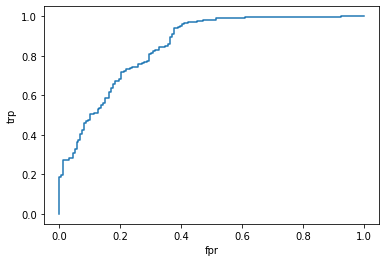

0.8481353529984941

In [109]:
import scikitplot as skplt
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(ytrain1[0:514],p)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [ ]:
ytrain1